# Final Project - Explainer Notebook - s153845 & s200348

## Table of Contents
- 1) Motivation

- 2.1) Basic Stats - COVID19 Impact Analysis
- 3.1) Data Analysis - COVID19 Impact Analysis

- 2.2) Basic Stats - Social Media Impact Analysis
- 3.2) Data Analysis - Social Media Impact Analysis

- 2.3) Basic Stats - Economy Impact Analysis
- 3.3) Data Analysis - Economy Impact Analysis

- 4) Genre
- 5) Visualizations
- 6) Discussion
- 7) Contributions
- 8) References

# 1) Motivation

The goal is to give the viewer throughout analysis of the COVID19 impact in US. We have chosen to deep dive into the virus' impact on US since US globally is a very interestring super power. Many other countries therefore tend to be highly effected by the situation in US. 

The analysis is three folded and looks at the impact from three different angles. These three studies are however very much connected and the impact of COVID19 has the tendency to spread like rings in the water across different viewing points. When reading through our website should the viewer hopefully be guided through the complete COVID19 experience in US and how the country ended up following the red curve instead of the green curve and which massive consequenses that emerged simultaneously. 

The three analyses made and the datasets they are based on is: 
- COVID19 Impact Analysis
    - Main Dataset: COVID19Data - Data about Confirmed cases, Deaths, Recovered each day for each country. This dataset has been used to analyse the spread of COVID19 is US and provide information of the severity of the COVID19 spread in US compared to other countries.  
    - Secondary Dataset: EnrichedCOVID19Data - Data gives detailed demographic information of all countries and has been used to provide features for machine learning model in order to forecast the Number of deaths in the next couple of days. 

- Social Media Impact Analysis
    - Main Datasets: xx-xx-2020_CoronaVirus_Tweets - Each dataset consist of all COVID19 related tweets on a given day. First dataset is from start march and last dataset is end april. Each day is loaded in a seperate dataset because of it's big size and has then been merged to one massiv twitter dataset. The twitter data is used to analyrize the puplic awareness and and concerns toward COVID19. 
    - Secondary Dataset: WorldCityLocationTable - This dataset has been used to translate citycodes from tweets to latitude and longitude coordinates to be able to map out the COVID19 awareness both locally in US and globally. 
- Economic Impact Analysis
    - **RASMUS ROTTWITT**

# COVID19 Impact Analysis
---------------
## Initialization 

This analysis will focus on the spread of corona virus in US. The goal with the analysis is to understand the current situation and predict future development in US to gain some knowledge for the US stock prices analysis. This analysis will start broad and then narrow down to focus only on US and some selected countries for comparison. 

## 2.1) Basic Stats

The following section is an exploratory data analysis and will look into initial data cleaning and preprocessing and futhermore contain key plots to describe the dataset.

First is needed packages imported

In [9]:
# Initial Imports
import numpy as np
import pandas as pd 
import math 
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib style options
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

The main dataset is then loaded and the Date column is converted to a datetime object

In [209]:
# Loading COVID19 data into pandas dataframe
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

# Converting the date format from object to datatime
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

First, a general analysis of the corona impact world wide is made. This is done to get an overall view of the 
severity of the corona virus. Below is a plot showing the development of COVID19 from a local chinese virus to a global pandemic. 

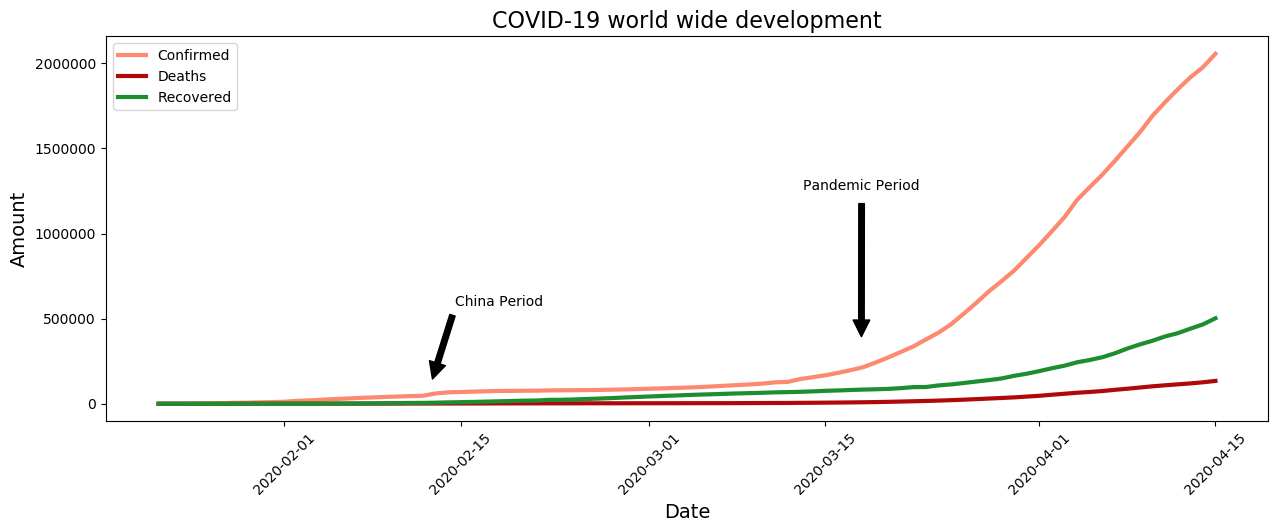

In [210]:
# Constructing a dataframe with the total sum of Confirmed, Deaths and recoved grouped by each date
Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date"]].groupby(["Date"]).sum()

# Plot of COVID-19 Development
plt.figure(figsize=[15,5])
plt.title("COVID-19 world wide development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
# Plotting lines
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=3)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=3)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=3)
plt.xticks(rotation=45)
# Adding text and arrows
plt.annotate('China Period', xy=(0.28, 0.1),xytext=(0.3, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.65, 0.2),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.show()

From the plot of the world wide corona development it is seen that the China-outbreak was very little compared to the Pandemic-outbreak starting in March. It is also seen that the outbreak most likely follow a sigmoid distribution with an expenential growth at the beginning before gradually slowing down. 

Since the number of confirmed cases looks to be growing exponentially is a chart with a logarithmic y-axis also made to give a better comparison of the relation ship between confirmed cases, deaths and recoveries.

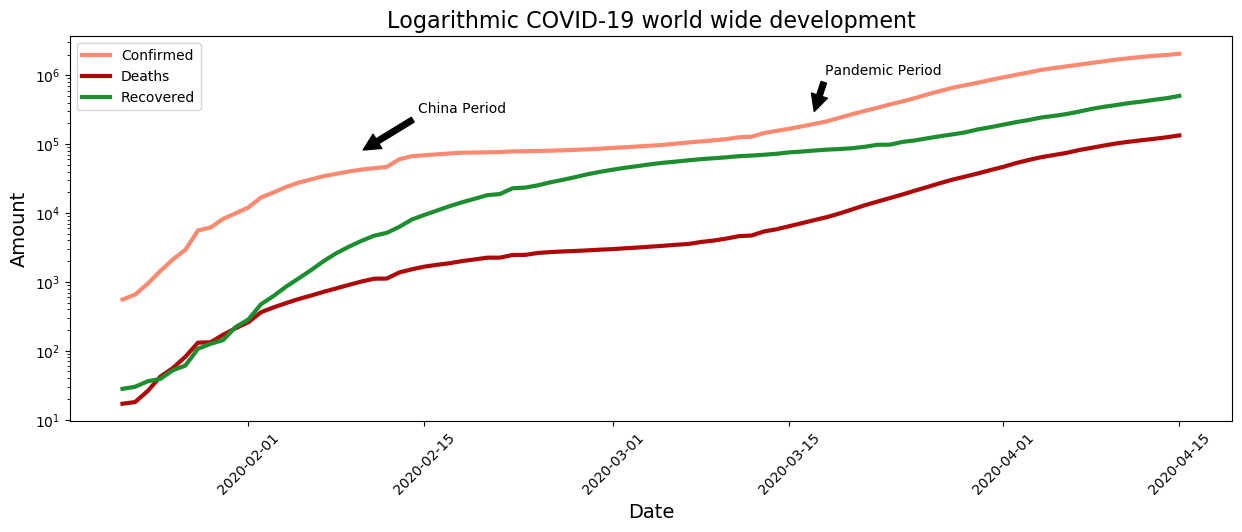

In [211]:
# Log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("Logarithmic COVID-19 world wide development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)

# Plotting lines
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=3)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=3)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=3)
plt.xticks(rotation=45)
# Adding text and arrows
plt.annotate('China Period', xy=(0.25, 0.7),xytext=(0.3, 0.8), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.64 , 0.8),xytext=(0.65, 0.9), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.yscale("log")

plt.show()

The logarithmic plot show a more or less stable relationship between the number of deaths and the number of cases, and thereby a stable mortality rate. The mortality rate is the percentage of death per confimed cases. 

In order to take a more detailed look of the behaivior of the mortality rate is the mortality rate plotted below. 

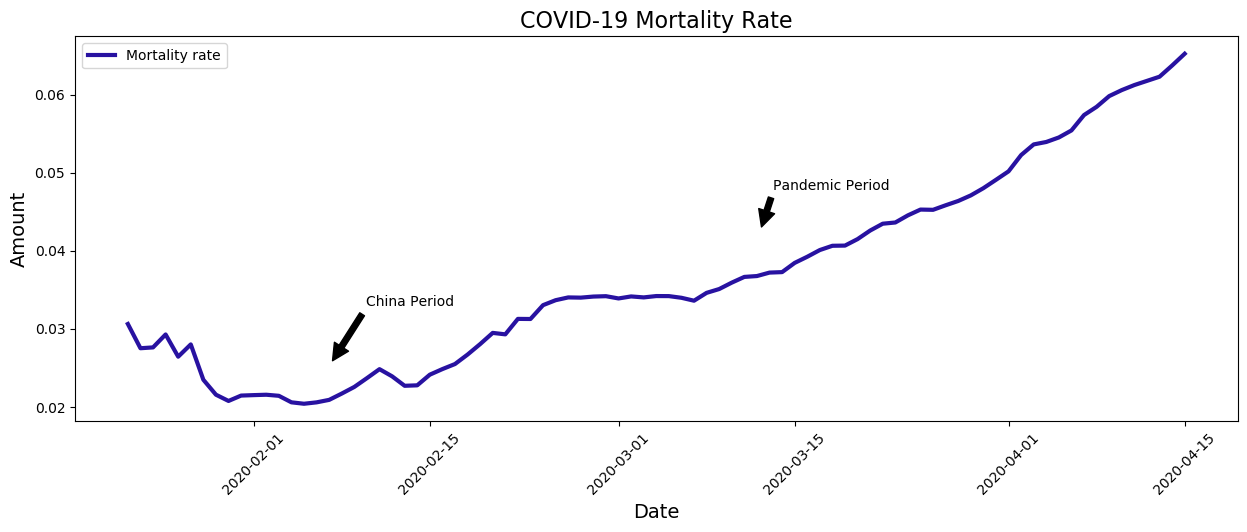

In [212]:
# Plotting mortality rate gived by relationship bewteen deaths and confirmed. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Mortality Rate",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)

# Plotting line
plt.plot(Time_stats.index,(Time_stats['Deaths']/Time_stats['Confirmed']),c="#2812A1", linewidth=3)
plt.xticks(rotation=45)

# Adding text and arrows
plt.annotate('China Period', xy=(0.22, 0.15),xytext=(0.25, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.59, 0.5),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Mortality rate',))
plt.show()

This plot shows som very interesting results. The mortality rate was between 2%-3% during the outbreak in China, but since the pandemic outbreak has started has the mortality rate increased a lot and has in mid april increased to above 6%. What has caused this sudden increase in the mortality rate? Below is some possible scenarios. 

**1)** Virus has become more agressive/dangourous - Nothing indicates that this has happened. 

**2)** Health care collaps is causing increase - Health care collaps is sure causing many deaths, but the health care in China also collapsed, so it doesnt explain the sudden increase

**3)** Countries is overwhelmed by virus and dont have equipment or recourses to test agressevily enough which causes a huge dark number of people who is actual infected but doesn't count in the statistics.

The third theory seems by far to be the most likely expacially with the knowlegde from WHO that only 20 % of infected get severe sympthoms. This also means that we cannot trust the number of confirmed cases blindly if we want to avoid flawed results.

### Heatmaps
Heatmaps is a powerfull visulization tool when doing exploratory data analysis. Below has heatmaps been used to give a nice overview of the world situation at the moment while at the same time giving the viewer the possiblity to easy and quickly compare two or several countries of interest. 

The first heatmap looks at the number of deaths in each country. The number of deaths has been chosen as the measure since it is assumed to be a lot more precise than the number of confirmed cases.

To visualize the heatmaps is a new dataframe (Date_Country_stats) defined. This dataframe looks at the summurized COVID19 stats per day per country. Prior to the heatmap plots is some preprocessing of the new dataframe also done. A mortality rate column is added and a Logarithmic transformation column of the deaths is also added to improve visualizations of exponential data. Futhermore is yet another dataframe defined which only contains the latest values for each country. 

In [213]:
# Preparing dataframe used to make heatmaps
# Grouping by date and country to get Confirmed and Deaths for the whole country inclusive regions
Date_Country_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Date","Country/Region"]).sum()
# Adding mortality rate column to the dataframe
Date_Country_stats['Mortalityrate'] = Date_Country_stats['Deaths']/Date_Country_stats['Confirmed']
# Adding logarithmic death count column to the dataframe
Date_Country_stats['LogDeaths'] = np.log(Date_Country_stats['Deaths']+1)

# Defining newest date
target_date = max(Date_Country_stats.index.get_level_values(0))
# Selecting the newest date only
Newest_Date_Country_stats = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

In [214]:
# Plotting death count heatmap for the newest date
import plotly.express as px
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',
                    title='World map of casaulties')
fig.show()

The world map shows that US and Europe both are in some critical situations with many deaths. Africa is on the other hand doing good for now.

The above heatmap gives a good look at how critical the situation is up until now. But in order to estimate where the situation might have the potiential to be critical in the future is the mortality rate in the different countries plotted. This will indicate both if a collaps of the healt care system in the country is happening and causing high mortality rate or if the country not is prepared for massive testing, which also can cause high mortality rate in statistics. 

In [215]:
# Plotting Mortality rate
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="Mortalityrate", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Mortalityrate'],range_color=[0, 0.25], 
                    color_continuous_scale=[[0, 'rgb(245,245,255)'], [1, 'rgb(0,0,255)']],
                    title='World map of Mortality Rate')
fig.show()

The mortality rate world map shows really high mortality rate in Africa. However when hovering over the chart most African countries still has very low amount of deaths. Therefore is it assumed that the high mortality rate in Africa is due to lack of testing opportunities. 


Both heapmaps above show the current situation. To show how and at was pace the whole corona situation unfolded is a gif with number of deaths over time made below. From the gif can it be seen that all non asian countries actually had a lot of time to react while the virus was kept in mainly China. 
![Movie](https://github.com/rasmusbrottwitt/SocialDataScience2020FinalProject/blob/master/spread/Covid19timeheatmap.gif?raw=true "movie")

Below is the method used to make the gif: 

In [216]:
#import os

#if not os.path.exists("images"):
#    os.mkdir("images")

In [217]:
##install this
##conda install -c plotly plotly-orca==1.2.1 psutil requests
## Running a loop of the choropleth plot to get a plot for each day. 
#indx = 1
#for d in Date_Country_stats.index.get_level_values(0).unique(): 
#    
#    temp = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == d]
#    fig = px.choropleth(temp, locations=Newest_Date_Country_stats.index.get_level_values(1), 
#                    locationmode='country names', color="LogDeaths", 
#                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
#                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
#                   color_continuous_scale='reds',
#                    title='World map of casaulties ' + str(d))
#    fig.write_image(str(indx) + ".png")
#    indx=indx+1

In [218]:
#import imageio
#images = []
#files = os.listdir('./images')
## Saving the gif
#for filename in range(1,len(files)):
#    if filename != '.ipynb_checkpoints':
#        images.append(imageio.imread('./images/' + str(filename)+ '.png'))
#kargs = { 'duration': 0.5 }
#imageio.mimsave('Corona_world_map.gif', images, 'GIF', **kargs )

The final part of the bacic stat analysis of the COVID19 will look at each country. The goal of the following is to compare the countries with each other and thereby find countries of interest for futher comparison with US.

A new dataframe (Country_Time_stats) is now made to be able to analyse the daily development in each country. 

In [219]:
# Dataframe used for analysis is constructed. 
Country_Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Country/Region","Date"]).sum()
# Country column made based on first part of index
Country_Time_stats['Country'] = Country_Time_stats.index.get_level_values(0)
# Date column made based on second part of index
Country_Time_stats['Date'] = Country_Time_stats.index.get_level_values(1)

Below is the number of confirmed cases, deaths and recoveries shown. Starting at january 22 until mid april.  
The same sigmoid distribution starting with an expenential growth can more or less be seen is the case for every country. China has clearly manage to bend the curve completely but other countries like Iceland and South Korea are also doing good.

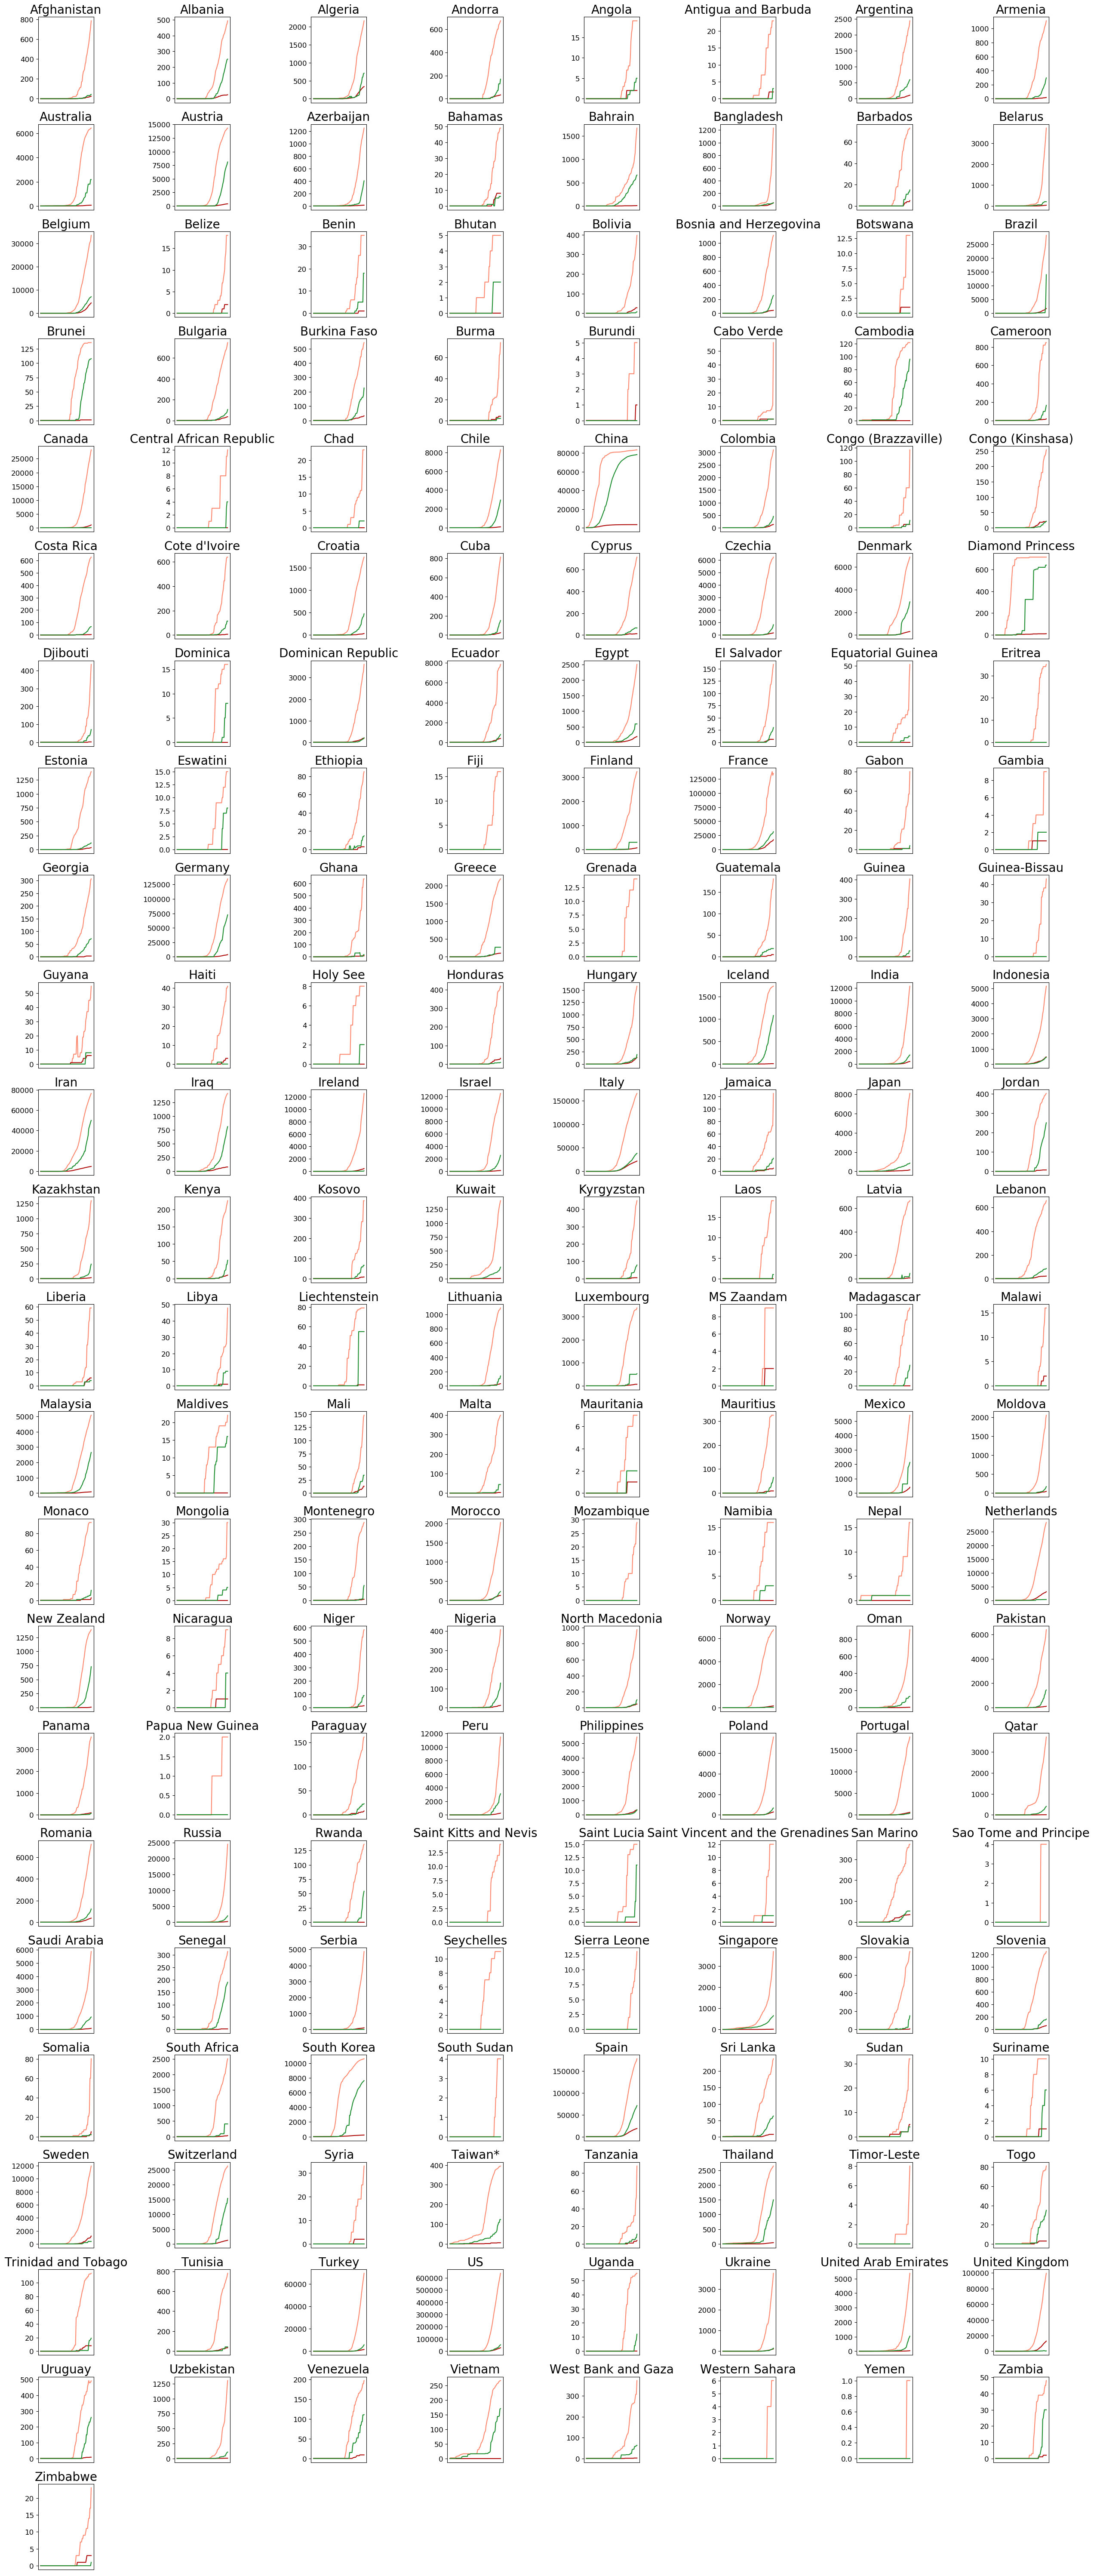

In [220]:
# Plotting COVID19 development for all countries. 
plt.figure(figsize=(25,60))
for i, elem in enumerate(Country_Time_stats['Country'].unique()):
    plt.subplot(24,8,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Country_Time_stats[Country_Time_stats.Country.isin([elem])]
    
    #Plotting lines
    plt.plot(temp_df['Date'],temp_df['Confirmed'],c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Deaths'],c='#AF0808')
    plt.plot(temp_df['Date'],temp_df['Recovered'],c='#1D8E30')
    
    plt.yticks(fontsize = 12)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()

Now is bar chart of the countrywise mortality rate (that also were shown in the above heatmap) shown. This time is countries with less than 500 confirmes cases removed in order to remove to much data uncertaintency. The point with this plot is to go from the very wide heatmap investigation to a narrow investigation of the most affected countries.
Futher data processing is done to obtain the dataframe necessary to provide the following bar charts. 

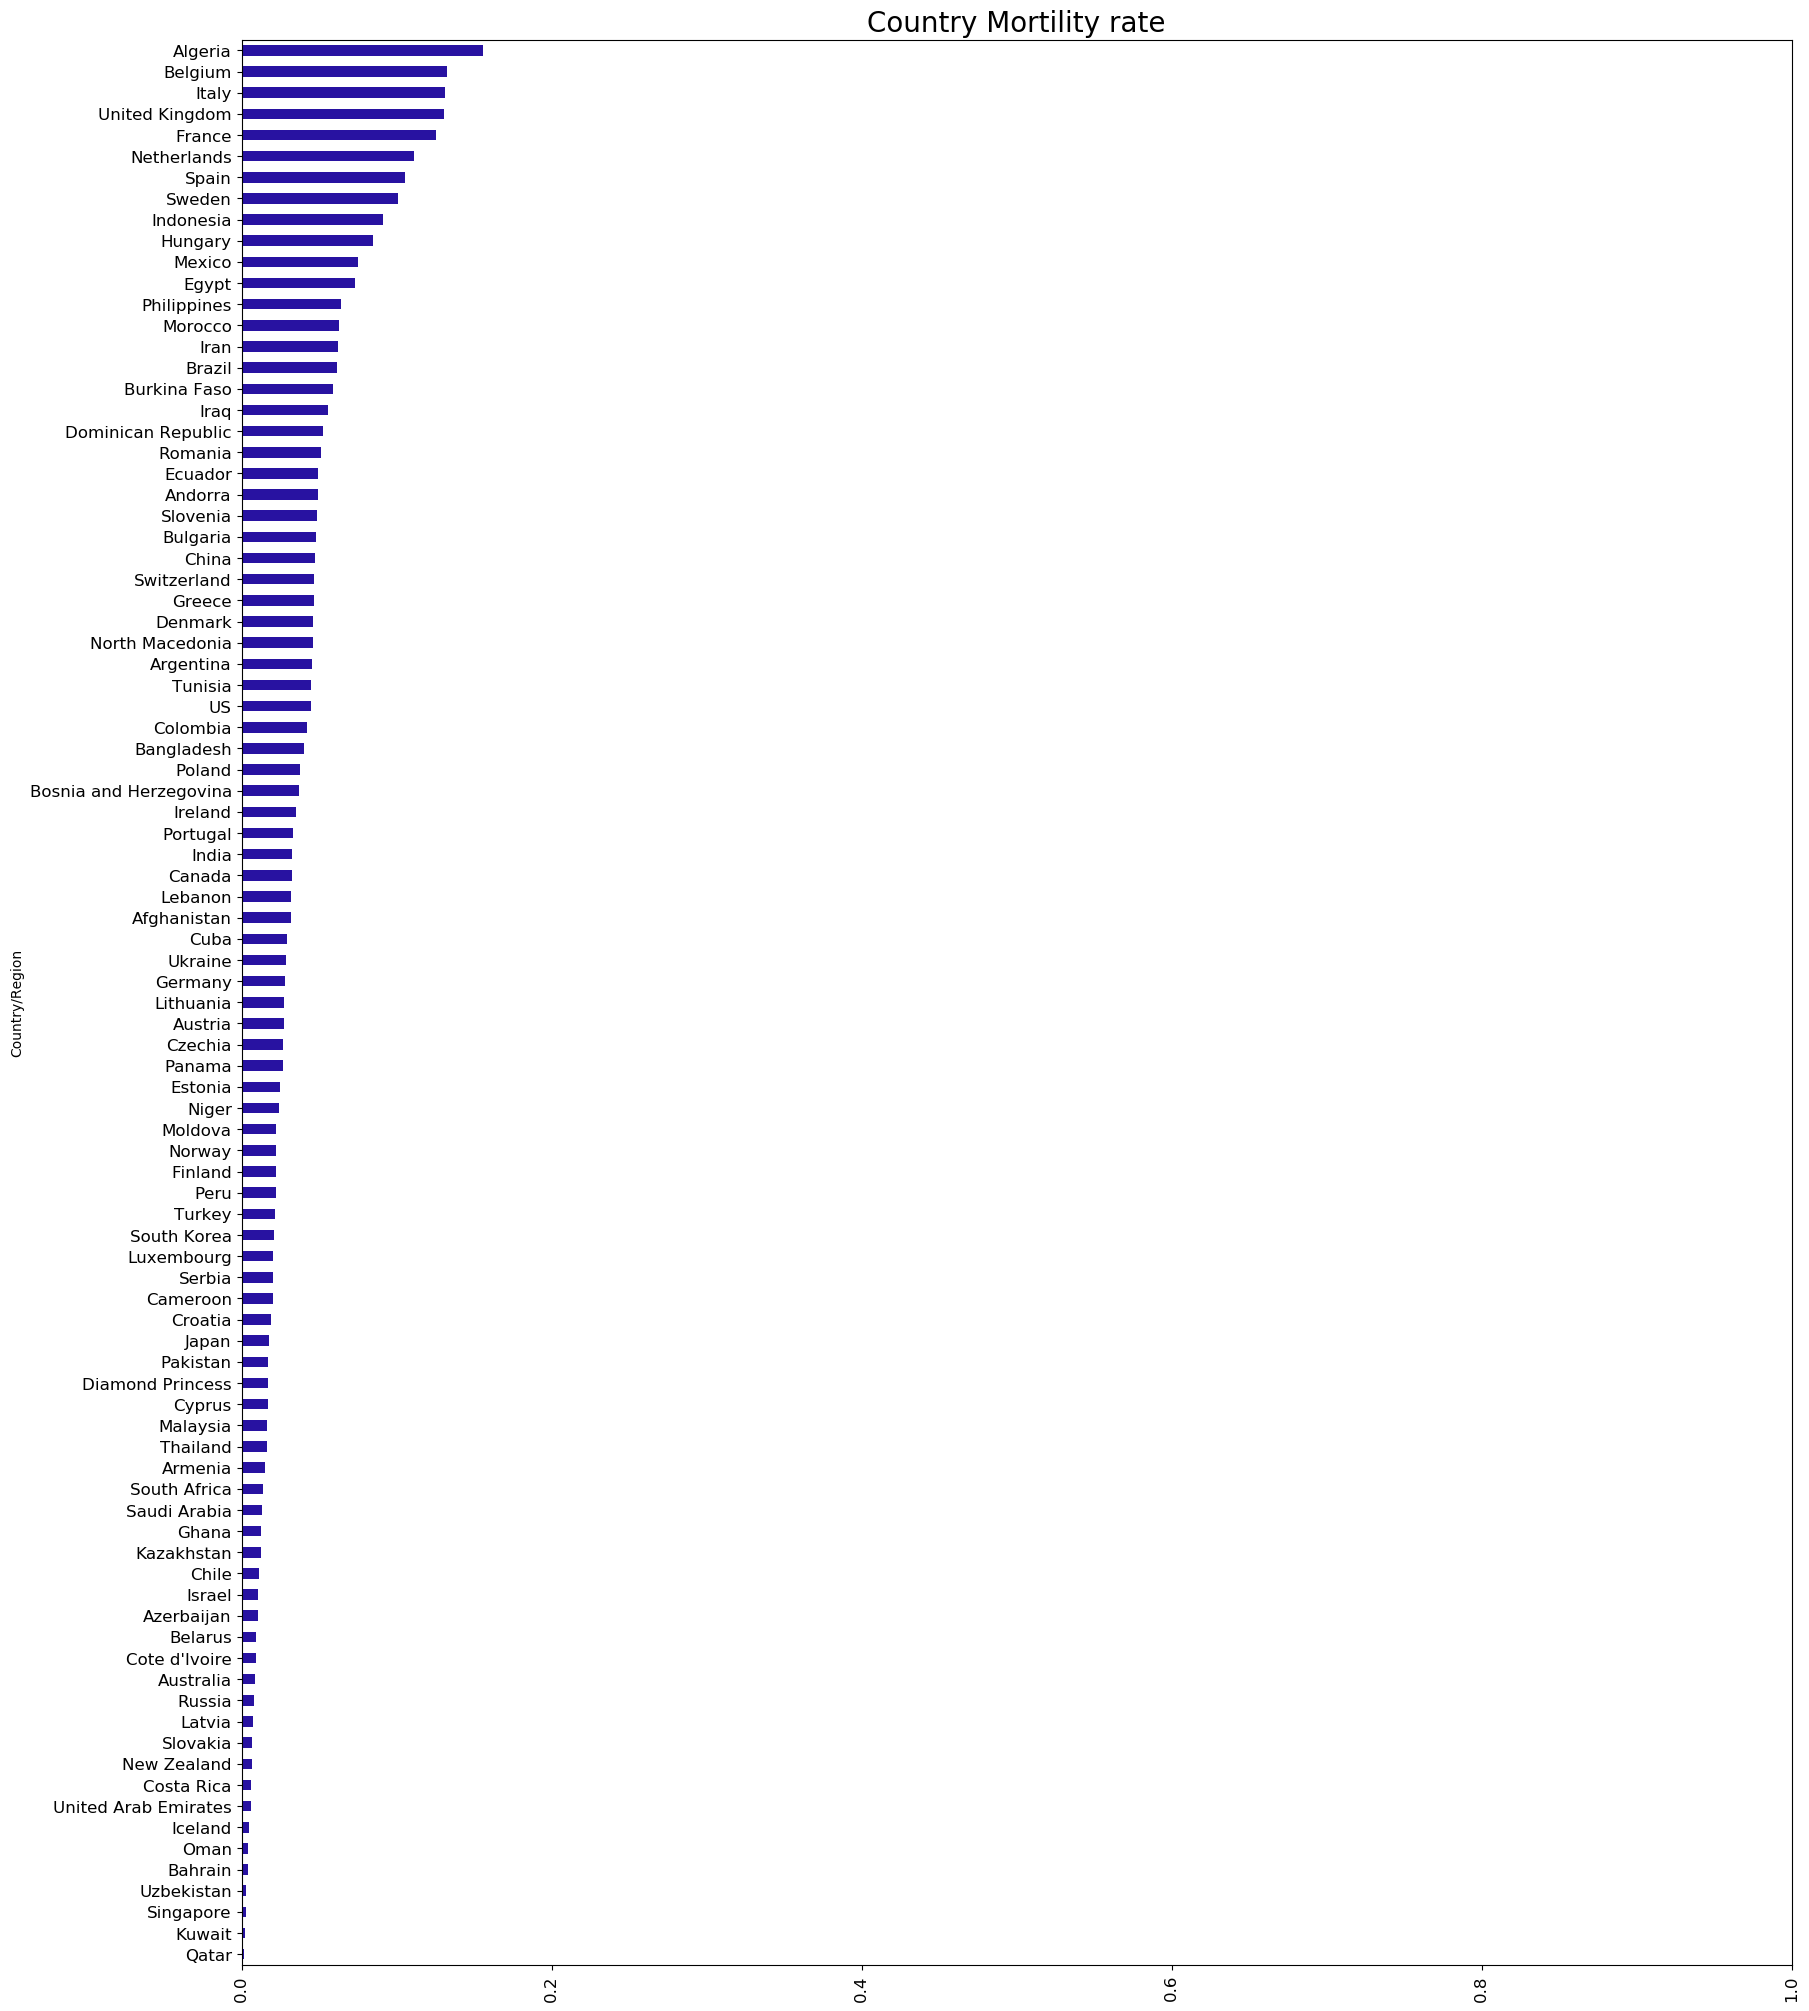

In [221]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# Filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
# Adding mortality rate to dataframe
Country_stats2['Mortalityrate'] = Country_stats2['Deaths']/Country_stats2['Confirmed']
# Sorting 
Country_stats2 = Country_stats2.sort_values(by=['Mortalityrate'], ascending=False)

# Plotting the mortality rate per country wtih more than 499 confirmed cases.
plt.figure(figsize=[20,25])
plt.title('Country Mortility rate', fontsize = 20)

Country_stats2['Mortalityrate'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.xlim([0,1])
plt.show()

From the bar chart is it obvios that many of the African countries that caught attention in the heatmap is removed since they number of confirmed cases is below the minimum of 500. We also see that the europiaen countryes sadly have a very high mortality rate. It is however still assumed that this is due to lack of testing. US has a lower mortality rate than many countries eventhough they have a huge number of deaths. This tells ud that they certainly not have giving up on testing and fighting the virus, which also makes the county so interstring to investigate.  

Below is a chart of the dead count per country. As the heatmap also showed is it US and Europe that tops this list. only countries with above 100 deaths can be seen in the chart. 

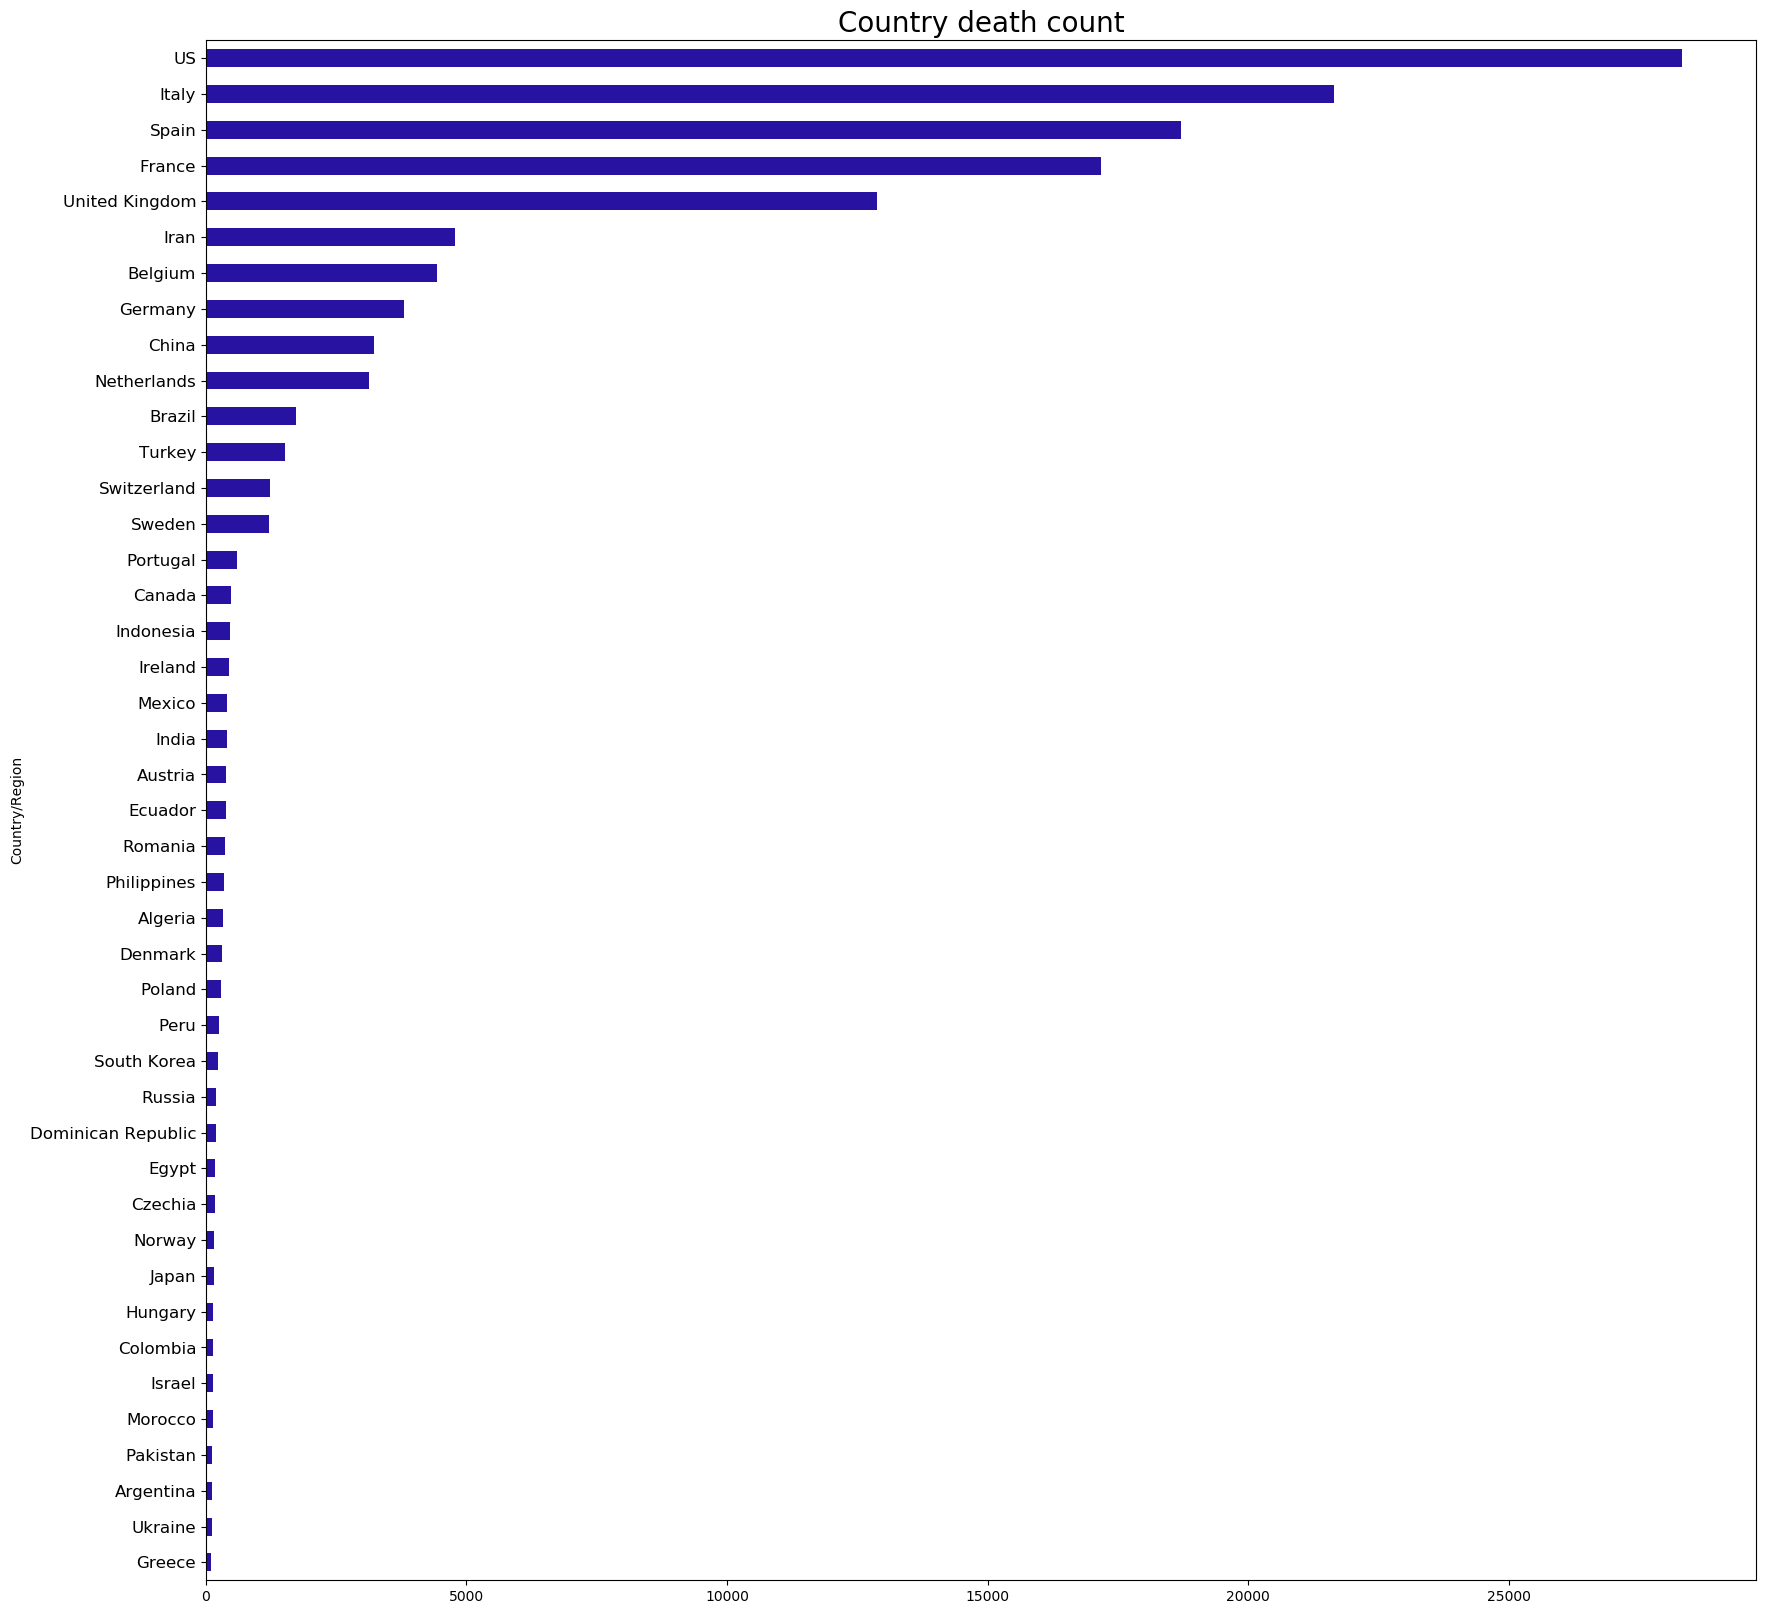

In [222]:
# Death count per country
plt.figure(figsize=[20,20])
plt.title('Country death count', fontsize = 20)
temp = Country_stats[Country_stats['Deaths']>100]
temp['Deaths'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.show()

**Key points from exploratory data analysis:** The COVID19 virus definitely took many unprepared countries by surprice very very fast. Almost the same development story with a suddenly exploding increase in number of confirmed cases can be shown for all counties. It is however also clear that the impact in each country very different from country to country and countries such as Denmark which acted very fast to the thread has succeded in following the green curve while countries like US, Italy that wasn't as fast with applying necessary actions has followed the red curve. 

Based on measured data is the mortality rate steady increasing. It is however likely that this is flawed and the real mortality rate is more or less steady through the whole pandemic. When looking at the global development plot of COVID19 is it almost unreal to see how little impalct the china period have had compared to the pandemic period. This could be one of the causes behind unprepared countries.

------------
## 3.1) Data Analysis

From the analysis above has a few countries been chosen for futher analysis and forecasting. The countries has been chosen based on number of deaths but also based on other factors which as made these countries stand out either based on the COVID19 situation or similarity to US. 

In [223]:
# Focused Countries
FocusCountries = ['US', 'Italy', 'United Kingdom', 'China','Canada', 'Denmark']

Three interactive bokeh chart will be made to be able to compare the countries and obtain more detailed information on how the virus has impacted the different countries. To be able to visualize the Bokeh charts is the data preprocessed prioer to each chart. First of all is a new dataframe made that only consist of the relevant countries. 

The three interactive charts are: 

1) Country wise timeline of COVID-19 casualties

2) Logarithmic country wise timeline of COVID-19 casualties

3) Country wise timeline of COVID-19 growth rate

In [224]:
# Importing necessary packages for Bokeh plotting. 
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.models.tools import HoverTool
from bokeh.models import Span

### Country wise timeline of COVID-19 casualties

This chart look at the overall death toll in each of the focused countries since the outbreak stated to be tracked in China at january 22.

In [225]:
# Preparing for dataframe bohek chart.
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats['Country'].isin(FocusCountries)]
# Extracting date for first bokeh plot
Bohek1 = Focus_Country_Time_stats['Deaths'].unstack().T
# Reseting index
Bohek1 = Bohek1.reset_index()
# Making data into pandas dataframe
Bohek1 = pd.DataFrame(data=Bohek1)
# Deleting unnecessary column
del Bohek1['Date']
# Reseting index
Bohek1 = Bohek1.reset_index()

In [226]:
 #Loading Bokeh enviroment
output_notebook()

Loading BokehJS ...

The intercative bokeh plot is then made. Many configurations can be implemented the the plot. The below code contains comments for made configurations.

In [227]:
# Importing dataframe as bokeh source
source = ColumnDataSource(Bohek1)

# Defining x axis list
date = df_corona['Date'].dt.date.unique().tolist()
date = [ str(x) for x in date ]

# Defining hover configurations
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]

# Defining figure
p = figure(x_range = FactorRange(factors=date), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Date',y_axis_label = 'Death toll',toolbar_location=None,tooltips=TOOLTIPS)

# Loop to fill figure with information from dataframe
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors

# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=60.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=61.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=53.5, dimension='height', line_color=coloring[4], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=48.5, dimension='height', line_color=coloring[5], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=46.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
    
# Adding legends
legend1 = Legend(items=items[0:6],click_policy='mute')
p.add_layout(legend1,'left')

# Rotation x-ticks
p.xaxis.major_label_orientation =3.1415/2
# Plotting chart
show(p)

We see how the virus deaths exploded suddenly in US and that US clearly is on the red curve. In comparison is countries as canada currently staying at the green curve. The dashed vertical lines indicates the lockdown date for each country. We see a huge different between Denmark and Canada that makes national lockdown before any deaths has arise, and clearly are on the green curve, compared to US, UK, and Italy which all made national lochdown pretty late when above 300 deaths had happened and clearly are on the red curve. One could ask why US, UK, Italy waited with the lockdown, did they not take it serously? where they afraid of the economic consequense? We will probably never know the thuth but when the countries starts to open again will it de very interestring to compare the lockdown lenght! maybe a fast lockdown decision means a shorter total lockdown period.  

### Logarithmic country wise timeline of COVID-19 casualties

This chart is looking into how the number of deaths in each of the focus countries has increased since the first death in the given country happend. 

To show this is a counter of days since the first deaths in each country added to the dataframe

In [228]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
# Empty string
day_count = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        # If statement to only count when confirmed people hits 1 
        if Focus_Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['DaysSinceOutbreak'] = day_count

In [229]:
# Preparing dataframe for Bokeh chart.
# Grouping by days since outbreak
Bohek2 = Focus_Country_Time_stats[["Deaths","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek2 = Bohek2.unstack().T
# Reseting index
Bohek2 = Bohek2.reset_index()
# Filtering
Bohek2 = pd.DataFrame(data=Bohek2)
# Printing
del Bohek2['DaysSinceOutbreak']
del Bohek2['level_0']
# Reseting index
Bohek2 = Bohek2.reset_index()

In [230]:
# Importing dataframe the a bokeh source
source2 = ColumnDataSource(Bohek2)

# Defining x ticks
days = source2.data['index'].tolist()
days = [ str(x) for x in days ]

#defining hover configuration
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]
# Defining figure
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Logarithmic Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Death toll',toolbar_location=None,y_axis_type="log",tooltips=TOOLTIPS)

# Loop to add information from source
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source2,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=24.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=19.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=17.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

#Adding legends    
legend1 = Legend(items=items[0:6],click_policy='mute')
p.add_layout(legend1,'left')


# Rotating x-ticks
p.xaxis.major_label_orientation =3.1415/2
# Plotting chart
show(p)

This plot maybe gives the answer to why to situation exploded in US. They waited 24 days from first confirmed death to lockdown the country! That is about a week more of uncontroled spread than UK and Italy who had lockdown at the aproximately same time since first death. When looking at UK and Italy it is also seen that the curve is almost identical. Denmark and Canada made lockdown before first death and the lockdown can therefore not be seen on the chart.

### Country wise timeline of COVID-19 growth rate

In order the plot the growth rate it is necessary to do some preprocessing of the dataframe both days since outbreak in country and growth rate column is added to the dataframe

In [231]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
# Empty string
day_count = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        # If statement to only count when confirmed people hits 1 
        if Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['DaysSinceOutbreak'] = day_count

#--------------------------------

# Making double loop to calculate growth rate per day for each country
# Empty string
growth_rate = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        # If statement to correct indexing issue of substrating the last death count of country 1 with first death count of country 2 ect.
        if Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1] > 0:
            growth_rate.append((Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1])/Country_Time_stats.iloc[d-1+indx2,1])
        else:
            growth_rate.append(0)  
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['GrowthRate'] = growth_rate

Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 0]
Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 1]

Before showing the interactive chart is the average growth rate per country shown below. This is a very important measure since it tell how fast the virus spread in the different countries. From the average plot is it seen that the virus is spreading very fast in US. 

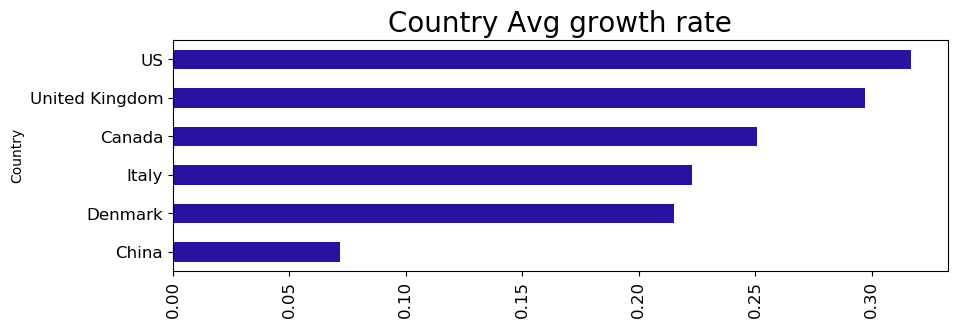

In [232]:
# Grouping mean growth rate pr country.
Country_growth_rate = Country_Time_stats[["GrowthRate","Country"]].groupby(["Country"]).mean()
# filter to only look at focus countries
Country_growth_rate = Country_growth_rate[Country_growth_rate.index.isin(FocusCountries)]

# Plotting the growth rate per FOCUS country.
plt.figure(figsize=[10,3])
plt.title('Country Avg growth rate', fontsize = 20)
Country_growth_rate.GrowthRate.sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [233]:
# Preparing dataframe for bohek chart
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats.Country.isin(FocusCountries)]
#Grouping by days since outbreak
Bohek3 = Focus_Country_Time_stats[["GrowthRate","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek3 = Bohek3.unstack().T
# Reseting index
Bohek3 = Bohek3.reset_index()
# Filtering
Bohek3 = pd.DataFrame(data=Bohek3)
# Printing
del Bohek3['DaysSinceOutbreak']
del Bohek3['level_0']
# Reseting index
Bohek3 = Bohek3.reset_index()
Bohek3 = Bohek3.drop([0, 1])

In [234]:
# Importing source
source3 = ColumnDataSource(Bohek3)

# Defining x axis ticks
days = source3.data['index'].tolist()
days = [ str(x) for x in days ]

# Defining hover tool
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Growth rate", "@$name"),
]
# Defining Figure
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 growth rate",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Growth rate',toolbar_location=None,tooltips=TOOLTIPS)


# Defining loop to import dataframe information to tool.
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source3,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=24.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=19.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
# Vertical line
vline = Span(location=17.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

    
# Adding legend
legend1 = Legend(items=items[0:6],click_policy='mute')
p.add_layout(legend1,'left')

# Rotating X ticks
p.xaxis.major_label_orientation =3.1415/2
# Showing figure
show(p)

We see that the growth rate become smaller and smaller - Together with information from death distribution in China seen in bokeh plot 1 does the virus looks to follow a sigmoid distribution more than a exponential distribution. Futher more we se that US almost constantly has the highest growth rate up until lockdown before it starts descresing. This tells that the national lockdowns difinetly has great impact. 

### Forecasting future deaths for focused countries

There is many reason why it is interestring to forecast the COVID19 impact in a near future time period. If a high increase in death rate is forecasted should the hospital probably get ready to help. Otherwise if a decreasing trend in the dayli number of deaths suddenly is forecasted is it maybe time for the givernment to begin the reopening of the country. Beacuse of the high correlation between COVID19 and the economy which will be futher investigated later could to also be very relevant for stock market changers to look into COVID19 prediction. 

To be able to forecast the near future death counts of the focused countries is a Machine learning algorithm made. 

The model will use both COVID19 related features and demographic features to make the prediction for four days ahead. The model is first trained on all past data and then tested with the data for all countries from 5 days ago in order to compare the predictions with the actual observed number of deaths for the four forecasted days. 

When a model is concluded to perform well enough is it used on the data from today in order to predict four days ahead of time. These predictions will be shown in a interactive bokeh chart. 

The prediction model is trained on all countries, therefore is the Country_Time_stats dataframe used. First is a lot of preprocessing done in order to obtain the wanted COVID19 related feature for the prediction model

In [235]:
# Reseting index and change inf growthrate to 1
Country_Time_stats = Country_Time_stats.reset_index(drop=True)
Country_Time_stats = Country_Time_stats.replace([np.inf, -np.inf], 1)

Making column with number of deaths happened today

In [236]:
# Empty string
death_lag0 = []
for i in range(0,len(Country_Time_stats['Country'])):
    if Country_Time_stats.iloc[i,5] == 2:
        death_lag0.append(Country_Time_stats.iloc[i,1])
    else:
        death_lag0.append(Country_Time_stats.iloc[i,1]-Country_Time_stats.iloc[i-1,1]) 
Country_Time_stats['death_lag0'] = death_lag0

Making lags to show the number of deaths for each of the last 4 days

In [237]:
# Making lags
Country_Time_stats['death_lag1'] = Country_Time_stats['death_lag0'].shift(1)
Country_Time_stats['death_lag2'] = Country_Time_stats['death_lag0'].shift(2)
Country_Time_stats['death_lag3'] = Country_Time_stats['death_lag0'].shift(3)
Country_Time_stats['death_lag4'] = Country_Time_stats['death_lag0'].shift(4)

# Correcting overlap between countries when using lags. 
# Correcting lag 1
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag1'] = 0 
# Correcting lag 2
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag2'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag2'] = 0 
# Correcting lag 3
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag3'] = 0 
# Correcting lag 4
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 5, 'death_lag4'] = 0 
Country_Time_stats.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  death_lag3  death_lag4  
0       0.000           1       0.000       0.000       0.000       0.000  
1       0.000           0       1.000       0.000       0.000       0.000  
2       1.000           1       0.000       1.000       0.000       0.000  
3       1.000           2       1.000       0.000       1.000       0.000  
4       0.000           0       2.000       1.000       0.000       1.000

Creating target prediction variables for the next 4 days.

In [238]:
# Making reverse lags to show the number of deaths for each of the next 4 days 
Country_Time_stats['death_future1'] = Country_Time_stats['Deaths'].shift(-1)
Country_Time_stats['death_future2'] = Country_Time_stats['Deaths'].shift(-2)
Country_Time_stats['death_future3'] = Country_Time_stats['Deaths'].shift(-3)
Country_Time_stats['death_future4'] = Country_Time_stats['Deaths'].shift(-4)

# Creating key rows to shows which rows to be deleted due to country overlap
Country_Time_stats['delete_check1'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats['delete_check2'] = Country_Time_stats['DaysSinceOutbreak'].shift(-2)
Country_Time_stats['delete_check3'] = Country_Time_stats['DaysSinceOutbreak'].shift(-3)
Country_Time_stats['delete_check4'] = Country_Time_stats['DaysSinceOutbreak'].shift(-4)

# Have to delete all the rows before the row containing day 2 since they are messed up
# Making new copy of data with new name in order to be able to compare predicted and actual values later. 
Country_Time_stats_ML = Country_Time_stats[Country_Time_stats.delete_check1 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check2 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check3 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check4 != 2]

Only using last observation for each country as test data - the rest is training data

In [239]:
# making another key in order to know which rows should become test rows 
Country_Time_stats_ML['traintestsplitkey'] = Country_Time_stats_ML['DaysSinceOutbreak'].shift(-1)
Country_Time_stats_ML.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  ...  death_lag4  \
0       0.000           1       0.000       0.000  ...       0.000   
1       0.000           0       1.000       0.000  ...       0.000   
2       1.000           1       0.000       1.000  ...       0.000   
3       1.000           2       1.000       0.000  ...       0.000   
4       0.000           0       2.000       1.000  ...       1.000   

   death_future1  death_future2  death_future3  death_future4  delete_check1  \
0          1.000          2.000          4.000          4.000          3.000   
1          2.000          4.000          4.000          4.000          4.000   
2          4.000          4.000          4.000          4.000          5.000   
3          4.000          4.000          4.000          4.000          6.000   
4          4.000          4.000          4.000          4.000          7.000   

   delete_check2  delete_check3  delete_check4  traintestsplitkey  
0          4.000          5.000          6.000              3.000  
1          5.000          6.000          7.000              4.000  
2          6.000          7.000          8.000              5.000  
3          7.000          8.000          9.000              6.000  
4          8.000          9.000         10.000              7.000  

[5 rows x 21 columns]

Now is the enriched data with demographic information added the the current dataframe with the current features. Not all demographic data was avaiable for all countries. It as been chosen to only use demographic data that was obtainable for all countries. Therefore has a quarantine feature not been included even though it could have been very interestring. Included demographic features are instead age distribution, population, density, urban population and amount of hospital beds which all has the potiential to be very important for the spread of the virus. 

In [240]:
# Inserting enriched data 
df_enriched = pd.read_csv('./Data/enriched_covid_19_week_2.csv')
# Splitting country_state column into two to be able to merch with corona data
df_enriched[['Country','Region']] = df_enriched.Country_Region.str.split("_",expand=True)

df_enriched = df_enriched.drop(columns=['Id','ConfirmedCases',
       'Fatalities','restrictions', 'quarantine', 'schools','Province_State', 'Date','Country_Region','Region','lung', 'femalelung', 'malelung','smokers_perc'])
df_enriched.columns

Index(['age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop', 'hospibed', 'Country'],
      dtype='object')

In [241]:
df_enriched = df_enriched.groupby(['Country']).mean()
df_enriched

age_0-4  age_5-9  age_10-14  age_15-19  age_20-24  age_25-29  \
Country                                                                     
Afghanistan    0.146    0.139      0.133      0.119      0.101      0.080   
Albania        0.058    0.058      0.056      0.069      0.079      0.085   
Algeria        0.115    0.106      0.087      0.066      0.068      0.082   
Andorra        0.092    0.093      0.080      0.072      0.078      0.082   
Angola         0.176    0.155      0.132      0.107      0.088      0.074   
...              ...      ...        ...        ...        ...        ...   
Uzbekistan     0.103    0.098      0.087      0.076      0.083      0.095   
Venezuela      0.083    0.096      0.093      0.088      0.074      0.071   
Vietnam        0.081    0.078      0.073      0.067      0.070      0.088   
Zambia         0.160    0.148      0.132      0.115      0.095      0.078   
Zimbabwe       0.141    0.149      0.129      0.110      0.093      0.074   

             age_30-34  age_35-39  age_40-44  age_45-49  ...  age_75-79  \
Country                                                  ...              
Afghanistan      0.064      0.053      0.043      0.034  ...      0.004   
Albania          0.078      0.058      0.053      0.059  ...      0.030   
Algeria          0.085      0.081      0.069      0.056  ...      0.012   
Andorra          0.085      0.075      0.067      0.064  ...      0.014   
Angola           0.062      0.050      0.040      0.033  ...      0.004   
...                ...        ...        ...        ...  ...        ...   
Uzbekistan       0.091      0.076      0.063      0.055  ...      0.007   
Venezuela        0.073      0.069      0.066      0.060  ...      0.014   
Vietnam          0.087      0.080      0.072      0.067  ...      0.012   
Zambia           0.065      0.054      0.044      0.033  ...      0.004   
Zimbabwe         0.067      0.059      0.050      0.035  ...      0.006   

             age_80-84  age_85-89  age_90-94  age_95-99  age_100+  total_pop  \
Country                                                                        
Afghanistan      0.002      0.001      0.000      0.000     0.000  38928.341   
Albania          0.019      0.008      0.002      0.000     0.000   2877.800   
Algeria          0.008      0.004      0.001      0.000     0.000  43851.043   
Andorra          0.008      0.004      0.001      0.000     0.000   9240.438   
Angola           0.002      0.001      0.000      0.000     0.000  32866.268   
...                ...        ...        ...        ...       ...        ...   
Uzbekistan       0.005      0.002      0.001      0.000     0.000  33469.199   
Venezuela        0.008      0.004      0.002      0.001     0.000  28435.943   
Vietnam          0.009      0.006      0.003      0.001     0.000  97338.583   
Zambia           0.002      0.001      0.000      0.000     0.000  18383.956   
Zimbabwe         0.003      0.001      0.000      0.000     0.000  14862.927   

             density  urbanpop  hospibed  
Country                                   
Afghanistan   60.000    25.000     0.500  
Albania      105.000    63.000     2.900  
Algeria       18.000    73.000     1.900  
Andorra      164.000    88.000     2.500  
Angola        95.000    67.000     2.700  
...              ...       ...       ...  
Uzbekistan    79.000    50.000     4.000  
Venezuela     32.000    80.000     0.800  
Vietnam      314.000    38.000     2.600  
Zambia        25.000    45.000     2.000  
Zimbabwe      95.000    67.000     2.700  

[173 rows x 25 columns]

The enriched data is then merched to the COVID19 data. This dataframe now contains both all feeatures and target variables.

In [242]:
# Merging enriched data to corona data
Country_Time_stats_ML = Country_Time_stats_ML.merge(df_enriched, left_on=Country_Time_stats_ML['Country'], right_on=df_enriched.index)
del Country_Time_stats_ML['key_0']

In [243]:
Country_Time_stats_ML.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Country', 'Date',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey',
       'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop', 'hospibed'],
      dtype='object')

Before a ML model is fitted to the data is some preprocessing done: 

In [244]:
# Preprocessing of data
Country_Time_stats_ML = Country_Time_stats_ML.dropna() #

Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed']

Target = ['death_future1','death_future2','death_future3','death_future4']

# Defining train and test dataframes
Train = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey != 2]
Test = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey == 2]

# Feature and target dataframes for both train and test
X_train  = Train.loc[:, Features].values
y_train = Train.loc[:,Target].values
X_test  = Test.loc[:, Features].values
y_test = Test.loc[:,Target].values

# Normalizong the data with StandardScaler
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
#Important only to fit to the train data!
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

Now is a linear regression fitted to the data to give a baseline for comparison of other regressions. Maybe the linear regression turns out to be the best regression model since the model only are predicting 4 days ahead and a four days interval so far has looked aproximately linear since the interval is that narrow. 

In [245]:
# Linear regression - baseline for forcast
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Fitting and predicting with linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred1 = lin_model.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(lin_model, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  22493.079211459084
Mean Absolute Error:  44.73581824262819

Cross validated Mean Squared Error:  40458.53784164171
Cross validated Mean Absolute Error:  42.485716674619866


A cross validated mean absolute error of 43 deaths. it predicts off target with 43 deaths in average. this is not bad since many countries has several thounds deaths. 

Below is other regression model tested:

In [246]:
# Ridge regression
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=.5)
Ridge.fit(X_train, y_train)
y_pred1 = Ridge.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(Ridge, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  22475.191636279884
Mean Absolute Error:  46.072868472151136

Cross validated Mean Squared Error:  27843.560156413412
Cross validated Mean Absolute Error:  44.32756848500563


The cross validated mean absolute error is actual worse for the ridge regression than the linear regression. This regression model is dropped.

In [247]:
#Lasso Regression
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
y_pred1 = Lasso.predict(X_test)
# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(Lasso, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  22098.013025885604
Mean Absolute Error:  45.32071857628482

Cross validated Mean Squared Error:  12788.92182232605
Cross validated Mean Absolute Error:  32.74878072625749


The cross validated mean absolute error for the Lasso regression is only 32.8 deaths! this is more than 10 lower that the linear regression.

In [248]:
#LassoLars regression
LassoLars = linear_model.LassoLars(alpha=0.1)
LassoLars.fit(X_train, y_train)
y_pred1 = LassoLars.predict(X_test)
# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(LassoLars, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  19740.561369646326
Mean Absolute Error:  41.30123764205011

Cross validated Mean Squared Error:  10226.59851939531
Cross validated Mean Absolute Error:  25.079700982199153


The cross validated mean absolute error for the LassoLars regression is only 25.1 deaths! This is almost 20 lower that the linear regression MAE. The LassoLars Model clearly gives the best result and is therfore chosen as prediction model to forcast the number of deaths for the next four days. 

The four tested models is futhermore plotted next to each other for comparisons sake. It is from the plots clear that there isen't much difference between the models predictions.

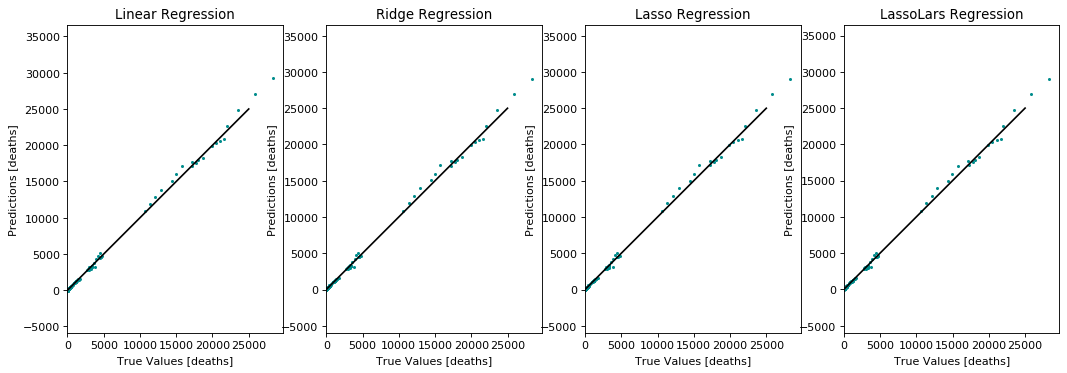

In [249]:
plt.figure(num=None, figsize=(16, 5), dpi=80)

#arrays with predicted values
test_predictions1 = lin_model.predict(X_test).flatten()
test_predictions2 = Ridge.predict(X_test).flatten()
test_predictions3 = Lasso.predict(X_test).flatten()
test_predictions4 = LassoLars.predict(X_test).flatten()

# Funtion for scatter plot
def scatter_plotter(y_test,test_predictions, c, Headline):
    plt.scatter(y_test, test_predictions, s=3, color=c)
    plt.xlabel('True Values [deaths]')
    plt.ylabel('Predictions [deaths]')
    plt.axis('equal')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([0, 25000], [0, 25000], color="black")
    plt.title(Headline)
    
 # plots
plt.subplot(1, 4, 1)
scatter_plotter(y_test.flatten(),test_predictions1, "#008C8C", 'Linear Regression')
plt.subplot(1, 4, 2)
scatter_plotter(y_test.flatten(),test_predictions2, "#008C8C" , 'Ridge Regression')
plt.subplot(1, 4, 3)
scatter_plotter(y_test.flatten(),test_predictions3, "#008C8C" , 'Lasso Regression')
plt.subplot(1, 4, 4)
scatter_plotter(y_test.flatten(),test_predictions4, "#008C8C" , 'LassoLars Regression')


The LassoLars Predictions is then added to the test dataframe in order to plot the difference between the actual values and predicted values

In [250]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred1[:,0]
Test['forecast2'] = y_pred1[:,1]
Test['forecast3'] = y_pred1[:,2]
Test['forecast4'] = y_pred1[:,3]

In [251]:
# Deleting unnecessary coulmns from test dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed'])

Constructing dataframe for predicted values: 

In [252]:
# Predicted values is obtained in a dataframe
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T

Constructing dataframe for values before prediction:

In [253]:
# Values before prediction starts is obtained in a dataframe
Country_Time_stats_ML
pre_prediction_values = Country_Time_stats_ML[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])

Merging pre prediction values with prediction values

In [254]:
# Dataframe with predictions for plotting
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

Correcting negative forecast trend error to make forcast even better. 

In [255]:
# Correcting negative forecast trend error to make forcast even better. 
# Loop the make sure that a forcasted number of deaths never can be less than the previous forcasted number of deaths.
for c in range(Prediction.shape[1]):
    for i in range(1,Prediction.shape[0]):
        j=i-1
        if Prediction.iloc[i,c] < Prediction.iloc[j,c]:
            Prediction.iloc[i,c] = Prediction.iloc[j,c]

Constructing dataframe of actual values for comparison in plot: 

In [256]:
# Actual values for comparison of predicted values in plot. 
Actual_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
Actual_values = pd.DataFrame(data=Actual_values)
Actual_values = Actual_values['Deaths']
# Dropping simbawe to match frames
Actual_values = Actual_values.drop(columns=['Zimbabwe'])
Actual_values = Actual_values.reset_index(drop=True)

The predicted number of deaths can then be prepared to the actual number of deaths

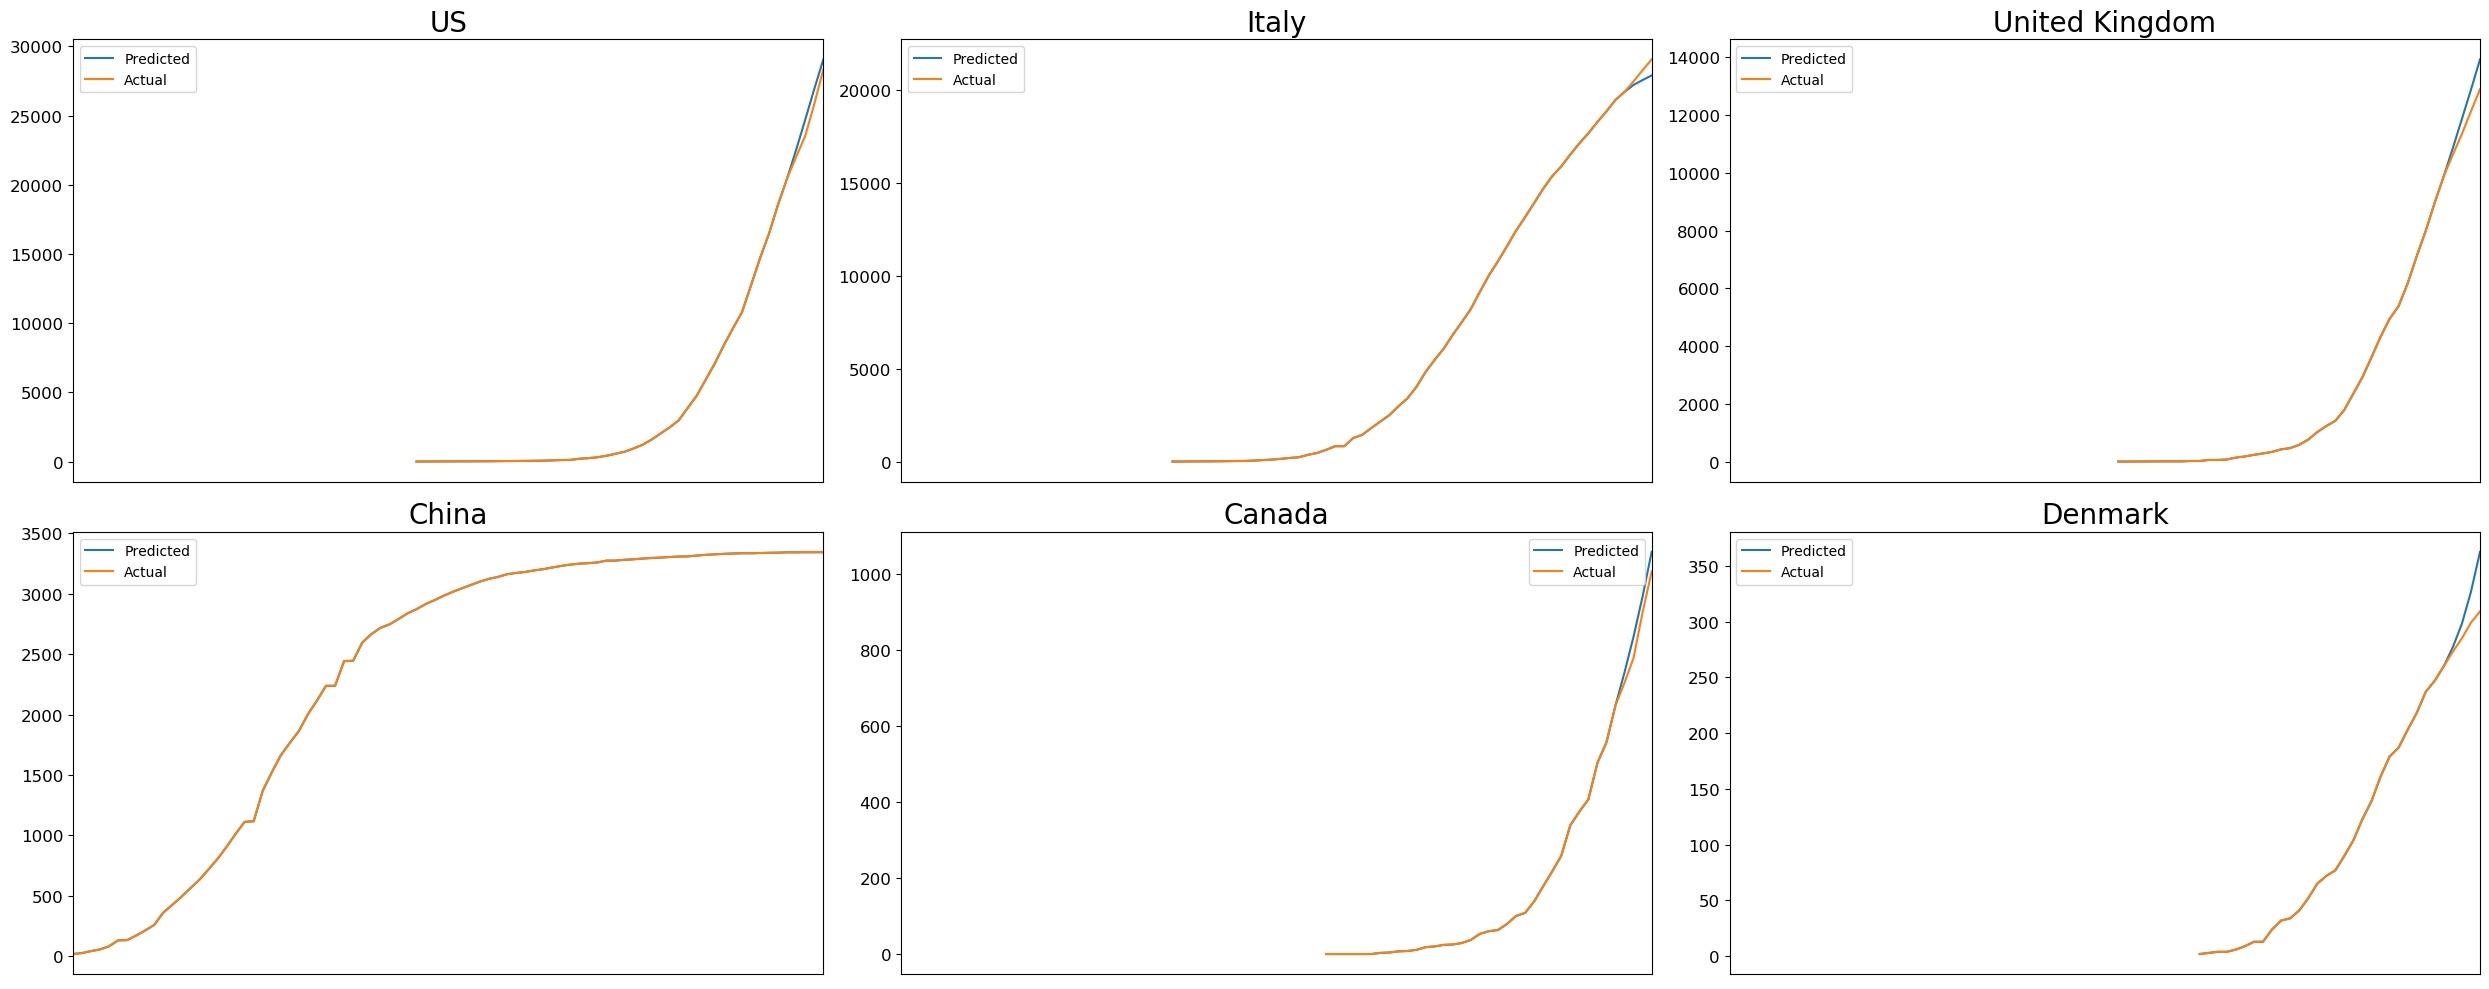

In [257]:
# Plot of predicted vs actual values for country.

plt.figure(figsize=(25,10))
indx=1
for i in FocusCountries:
    
    plt.subplot(2,3,indx)
    plt.title(i, fontsize = 20)
    
    # Plotting lines
    Prediction[i].plot(kind='line')
    Actual_values[i].plot(kind='line')
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
    indx=indx+1
    plt.legend(('Predicted', 'Actual'))
plt.tight_layout()

plt.show()

The prediction model has now been tested and from the above chart can it also be seen that the prediction accuracy is good. Now is an interactive chart with future prediction for the next four days made. 

In [258]:
# Making another key in order to know which rows should become the model input rows 
Country_Time_stats['traintestsplitkey'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats.head()

# Merging enriched data to corona data
Country_Time_stats= Country_Time_stats.merge(df_enriched, left_on=Country_Time_stats['Country'], right_on=df_enriched.index)
del Country_Time_stats['key_0']

The new input data is then transformed based on the fitted transformation of the original training data

In [259]:
# Updating the data for prediction. 

# Defining the features 
Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed']

#Updating the X_test dataframe
Test = Country_Time_stats[Country_Time_stats.traintestsplitkey == 2]
X_test  = Test.loc[:, Features].values
X_test = Sc.transform(X_test)

Predictions are then made with the newest data as input data

In [260]:
# Prediction
y_pred2 = LassoLars.predict(X_test)

In [261]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred2[:,0]
Test['forecast2'] = y_pred2[:,1]
Test['forecast3'] = y_pred2[:,2]
Test['forecast4'] = y_pred2[:,3]

In [262]:
# Deleting unnecessary coulmns from test dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed'])

Just like before is the predicted values for the next four days merged together with all the data leading up the the prediction date. 

In [263]:
# Predicted values
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T

# Values before prediction starts
pre_prediction_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])

# Dataframe with predictions for plotting. - Merging pre prediction values with prediction values
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

Correcting negative forecast trend error to make forcast even better

In [264]:
# Loop the make sure that a forcasted number of deaths never can be less than the previous forcasted number of deaths.
for c in range(Prediction.shape[1]):
    for i in range(1,Prediction.shape[0]):
        j=i-1
        if Prediction.iloc[i,c] < Prediction.iloc[j,c]:
            Prediction.iloc[i,c] = Prediction.iloc[j,c]

Transforming the prediction dataframe to be ready for implementation in bokeh

In [265]:
Bokeh4 = Prediction[FocusCountries]
Bokeh4 = Bokeh4.apply(np.floor)

Configuring the bokeh chart and plotting

In [266]:
source4 = ColumnDataSource(Bokeh4)

days = source4.data['index'].tolist()
days = [ str(x) for x in days ]

TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Death", "@$name"),
]
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Country wise Forecast of COVID-19 Deaths",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',tools='wheel_zoom',tooltips=TOOLTIPS)


line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source4,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

# Vertical line
vline = Span(location=83, dimension='height', line_color='grey', line_width=2)
p.renderers.extend([vline])
    
legend1 = Legend(items=items[0:6],click_policy='mute')
p.add_layout(legend1,'left')


p.xaxis.major_label_orientation =3.1415/2
show(p)

The vertical grey line is where the predicted period begins. From this forecast chart is it clear why an almost complete lockdown as early as possible is very effective. Italy has now been in complete lockdown for a month and the number of deaths is forecasted to decline a bit. We also see that US still dont feel the affect of the national lockdown and their dead count is forcasted to contunie. 

### True Number of Infected

A way to plan potential reopening of US is to look at the true number of infected. Since there is no problem in reopening if almost everybody already hav had the virus. The average time from infection to death is 17 days. This means that if the true mortality rate is 1% then if 1 person dies today was there 100 infected 17 days ago. This information can together with the avg. growth rate for COVID19 be used to give an estimate of the true number of infected in each country. 

First is the dataframe defined

In [267]:
# Defining Dataframe
Trueinfectednumber = Country_Time_stats[['Confirmed','Deaths','Recovered','Country',"Date",'GrowthRate']]
Trueinfectednumber['GrowthRate'] = Trueinfectednumber['GrowthRate'].mean()

Then is the doubling time calculated

In [268]:
# Calculating estimated doubling for COVID19 based on average growth rate. 
Trueinfectednumber['DoublingTime'] = 1/Trueinfectednumber['GrowthRate']

Based on three different mortality rate assumption is three different guesses about the true number of infected made.

In [269]:
# Changing number format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Calculating the true number of infected based on best guess on 3 mortality rate scenarios. 
Trueinfectednumber['TrueNumberofInfected_5%'] = (Trueinfectednumber['Deaths']/0.05)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_3%'] = (Trueinfectednumber['Deaths']/0.03)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_1%'] = (Trueinfectednumber['Deaths']/0.01)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))

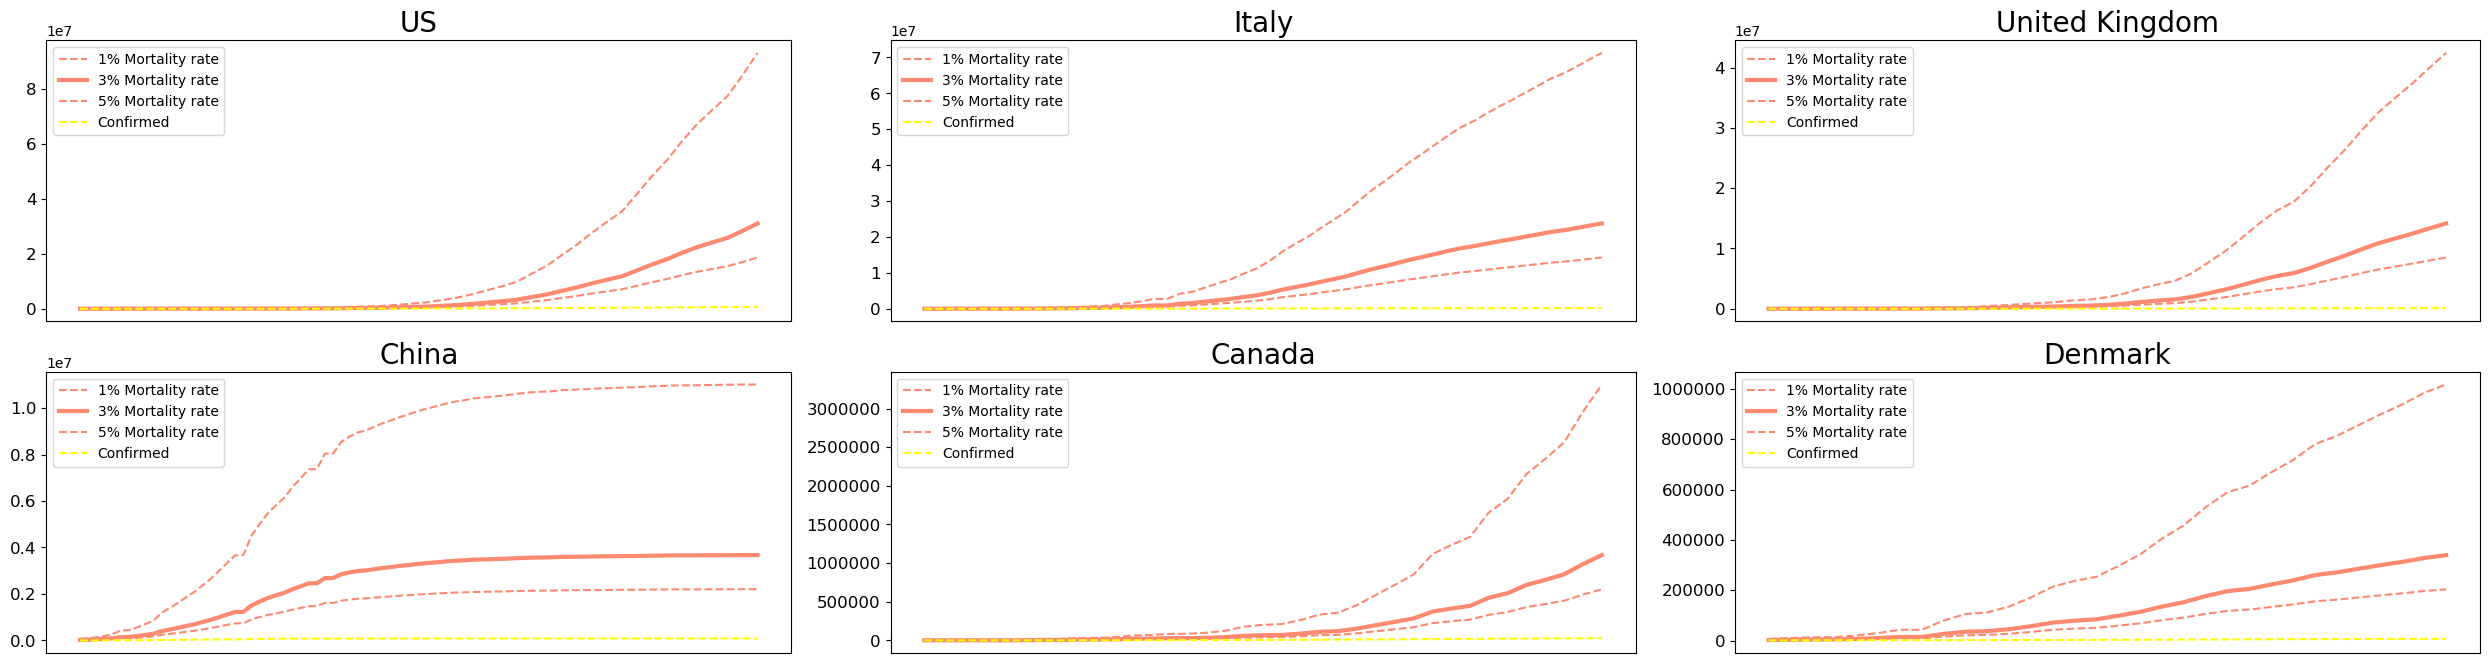

In [270]:
# Plotting true infected number for all countries. 
plt.figure(figsize=(25,20))
for i, elem in enumerate(FocusCountries):
    plt.subplot(6,3,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Trueinfectednumber[Trueinfectednumber.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_1%'],'--',c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_3%'],c="#FC8970",linewidth=3)
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_5%'],'--',c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Confirmed'],'--',c="yellow")
    
    plt.yticks(fontsize = 12)
    #plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
    plt.legend(('1% Mortality rate', '3% Mortality rate','5% Mortality rate', 'Confirmed'))
plt.tight_layout()
plt.show()

The charts dreally shows why it would be very interstring to know the real mortality rate. Relatively small changes is the mortality rate assumption from 3% to 1%  would mean that many many more million people would have had the infection. This is very important information to know when planning a reopening of a country like US 

# Social Media Analysis
---------------
## Initialization 

This analysis will focus on the social media reactions to the corona virus and the economic consequences of the virus in US. The goal with the analysis is to get insight in how the people of US relates to the virus and the consequences of the virus such as the lockdown and rapidly decreasing economic situation in the US. Futhermore will the analysis look into the global and national (US) awareness of the corona virus the social media.

## 2.2) Basic Stats

The following section is an exploratory data analysis and will look into initial data cleaning and preprocessing and futhermore contain key plots to describe the dataset.


First is the COVID19 dataframe transformed to be per date and only containing deaths and confirmed. Since the use of COVID19 data in this analysis is very specific. Naming this new dataframe df_corona_TW.

In [271]:
# Only keeping data from same period as twitter data
df_corona_TW = df_corona[df_corona['Date'] > '2020-03-03']
# Only keeping data from US
df_corona_TW = df_corona_TW[df_corona_TW['Country/Region'] == 'US']
# Grouping by date
df_corona_TW = df_corona_TW[['Date','Deaths','Confirmed']].groupby(['Date']).sum()

Then is the twitter data loaded

In [273]:
###Warning: Takes 5 minutes to run code below###

# String with dates to load twitter data from
dates = ['2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
        '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23','2020-03-24','2020-03-25','2020-03-26',
        '2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31','2020-04-01','2020-04-02','2020-04-03',
        '2020-04-04','2020-04-05','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-10','2020-04-11',
        '2020-04-12','2020-04-13','2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
        '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27',
        '2020-04-28','2020-04-29','2020-04-30']


# Loading initial twitter data file 
All_tweets = pd.read_csv('./Data/tweets/2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')
# Deleting rows without country code to shrink data set into only relevant data. 
All_tweets.dropna(subset = ["country_code"], inplace=True)

# Making loop to load the many ofther twitter data files
for i in dates:
    # New data file load 
    df_tweet = pd.read_csv('./Data/tweets/'+str(i)+' Coronavirus Tweets.CSV')
    # Deleting rows without country code to shrink data set into only relevant data. 
    df_tweet.dropna(subset = ["country_code"], inplace=True)
    # Merging newest load to the main dataframe. 
    All_tweets = pd.concat([All_tweets,df_tweet])

In [275]:
# Cleaning up dataframe - removing columns without importance. 
All_tweets = All_tweets.drop(['screen_name', 'source','reply_to_status_id','reply_to_user_id','reply_to_user_id',
                 'is_quote','is_retweet','friends_count','account_lang','account_created_at',
                 'favourites_count','reply_to_screen_name'], axis=1)

Size of twitter dataframe is printed below

In [276]:
All_tweets.shape

(1308276, 11)

Reformatting the datetime format and adding data column to the dataframe

In [277]:
# Reformatting the datetime column

# Importing time package
import time
# Defining empty datatime list
Datetime = []
# Looping over all date values in weather dataframe and appending correct matching datetime format to datetime list.
for i in All_tweets["created_at"].values:
    strp  = time.strptime(i[:19], "%Y-%m-%dT%H:%M:%S")
    strf = time.strftime("%Y-%m-%d %H:%M:%S", strp)
    Datetime.append(strf)
# Renaming datetime column to match column name for rounded datatime data in crime dataframe
All_tweets['Datetime'] = pd.to_datetime(Datetime)
# Removing original datatime column from dataset
All_tweets = All_tweets.drop(['created_at'], axis=1)

# Adding date
All_tweets['Date'] = pd.DatetimeIndex(All_tweets['Datetime']).date
All_tweets['Date'] = pd.to_datetime(All_tweets['Date'])

Printing a distribution plot of the daily amount of tweets about COVID19 since start march. It can be seen that the tweet amount peaked around mid-late march and then stabelized at a lower level in april. 

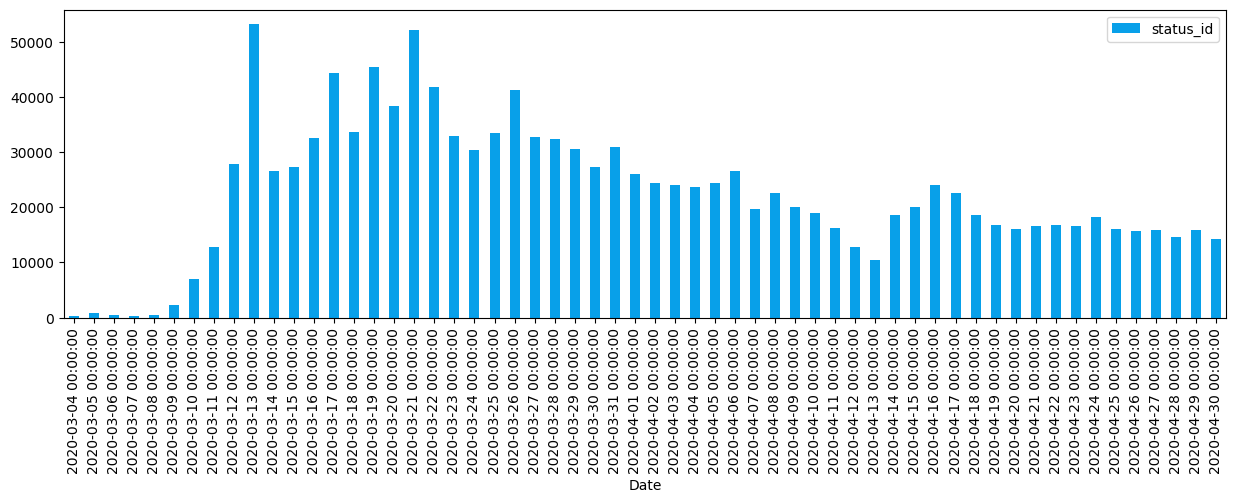

In [278]:
All_tweets[['Date','status_id']].groupby('Date').count().plot(kind='bar',color='#08a0e9')
plt.show()

------------
## 3.2 ) Data Analysis

### Social trends

Social media trends can be very powerful and is clearly the best way of showing the oppion of the people. This analysis can thereby help show how the people of US experience the COVID19 pandemic. In the following part will the text in the tweets be analysized in order to show eventual trends of topics. First is a text processing function made to clean the tweeted texts. For this part will the focus be on tweets made in US. 

In [279]:
# NLP Imports
from sklearn.feature_extraction import stop_words
import string

# Defining stop words 
my_stop_words = stop_words.ENGLISH_STOP_WORDS

# Text processing function
def text_processing(text):
    # Remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # Set all to lowercase
    text = "".join([c.lower() for c in text])
    # Remove stop words
    text = " ".join([w for w in text.split() 
                     if w not in my_stop_words])
    return text

In [280]:
# Only focusing on tweets from US
text_tweets = All_tweets[All_tweets['country_code'] == 'US']
# Only focusing on english language tweets
text_tweets = text_tweets[text_tweets['lang'] == 'en']
# Dropping eventual NaN values. 
text_tweets.dropna()

# Making a column in the dataframe for all tweets with the cleaned text - the text processing function is applied
text_tweets['clean text'] =text_tweets['text'].apply(text_processing)

Five trends of interest is analyzied by analysing the occurrence of some key words connected to the given trend.

In [281]:
# Adding one hot encoded columns to dateframe based on whether or not certain words was a part of a given tweet. 
text_tweets['Just a flu'] = text_tweets['clean text'].str.contains('|'.join(['hoax','lies',
                                                                            'fake','flu','cold'])).astype(int)

text_tweets['Apocalypse'] = text_tweets['clean text'].str.contains('|'.join(['crisis','run',
                                                                            'coronapocalypse',
                                                                            'coronapocolypse'])).astype(int)

text_tweets['Stayhome'] = text_tweets['clean text'].str.contains('|'.join(['socialdistancing','stayhome', 
                                                                           'quarantine','stayathome','quarantinelife',
                                                                           'lockdown','distancing','flattenthecurve',
                                                                           'stayhomesavelives','washyourhands',
                                                                           'sanitizer'])).astype(int)

text_tweets['Economics'] = text_tweets['clean text'].str.contains('|'.join(['workers', 'work', 
                                                                                 'business', 'job', 'money',
                                                                                 'economy','businesses','employees',
                                                                                 'office','restaurants',
                                                                                 'unemployment','company','companies',
                                                                                 'colleagues','paid',
                                                                                 'customers'])).astype(int)

text_tweets['Reopen!'] = text_tweets['clean text'].str.contains('|'.join(['open','reopen'])).astype(int)

# Grouping categories of interest by the date. 
gb1 = text_tweets[['Date','Just a flu','Economics','Apocalypse','Stayhome','Reopen!']].groupby('Date').sum()

Plotting US Twitter Reactions to COVID-19 

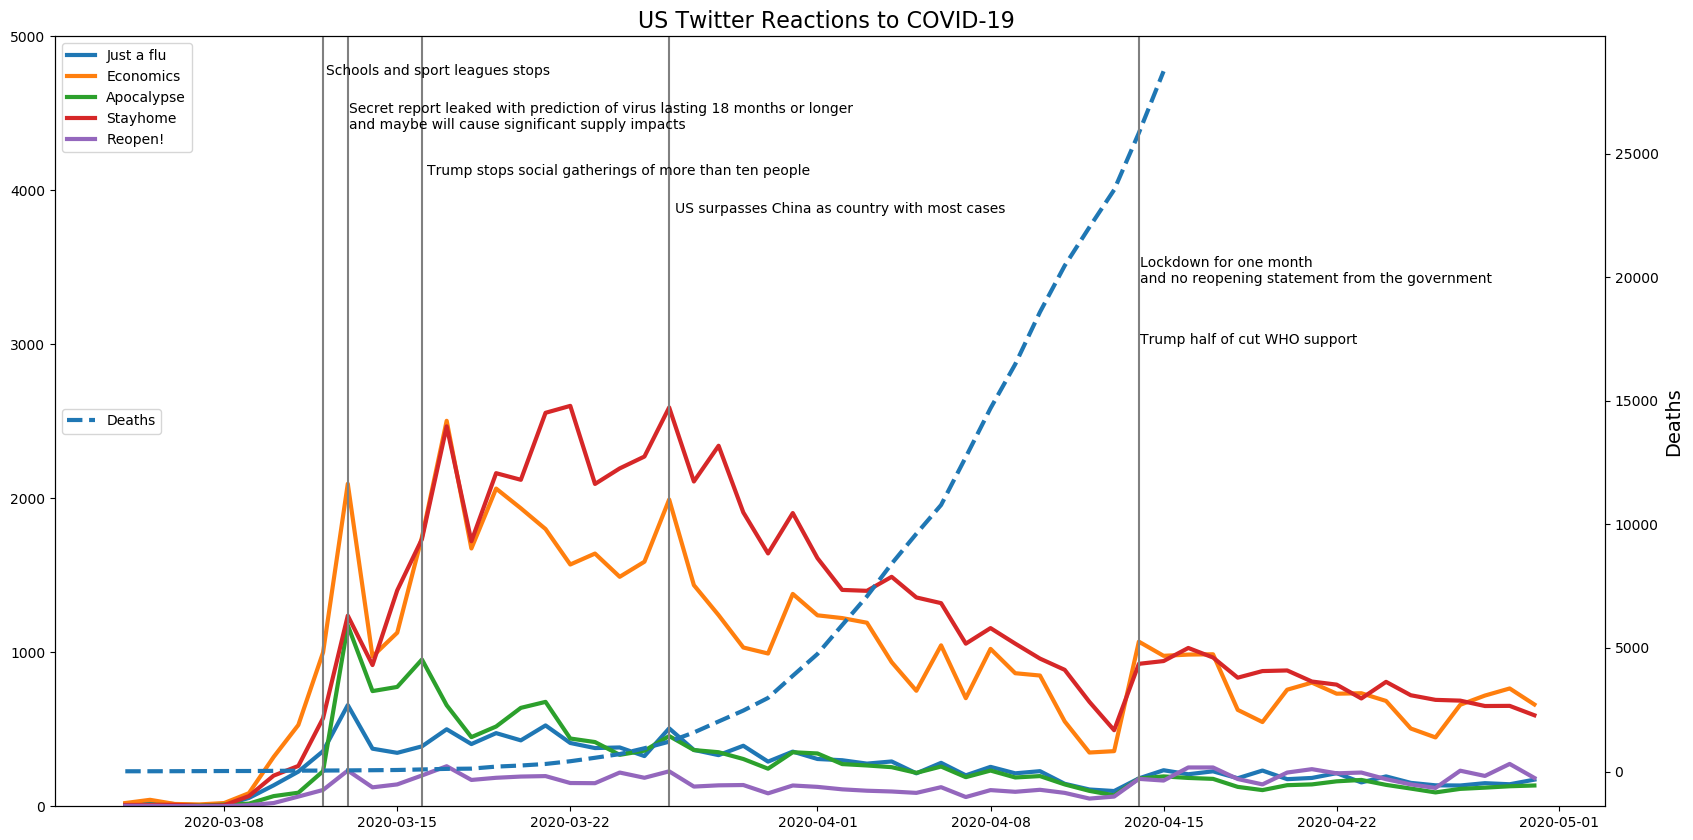

In [285]:
# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[20,10])
ax2 = ax1.twinx()

# Title and axis labels
plt.title("US Twitter Reactions to COVID-19 ",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Deaths',fontsize=14)
ax1.set_ylim(0,5000)

# Plotting lines
ax1.plot(gb1.index,gb1['Just a flu'], linewidth=3)
ax1.plot(gb1.index,gb1['Economics'], linewidth=3)
ax1.plot(gb1.index,gb1['Apocalypse'], linewidth=3)
ax1.plot(gb1.index,gb1['Stayhome'], linewidth=3)
ax1.plot(gb1.index,gb1['Reopen!'], linewidth=3)
ax2.plot(df_corona_TW.index,df_corona_TW['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-03-12',c='grey')
plt.annotate('Schools and sport leagues stops',xy=(0.175, 0.95), xycoords='axes fraction')
plt.axvline(x='2020-03-13',c='grey')
plt.annotate('Secret report leaked with prediction of virus lasting 18 months or longer ',xy=(0.19, 0.90), xycoords='axes fraction')
plt.annotate('and maybe will cause significant supply impacts ',xy=(0.19, 0.88), xycoords='axes fraction')
plt.axvline(x='2020-03-16',c='grey')
plt.annotate('Trump stops social gatherings of more than ten people',xy=(0.24, 0.82), xycoords='axes fraction')
plt.axvline(x='2020-03-26',c='grey')
plt.annotate('US surpasses China as country with most cases',xy=(0.40, 0.77), xycoords='axes fraction')
plt.axvline(x='2020-04-14',c='grey')
plt.annotate('Lockdown for one month',xy=(0.7, 0.70), xycoords='axes fraction')
plt.annotate('and no reopening statement from the government',xy=(0.7, 0.68), xycoords='axes fraction')
plt.annotate('Trump half of cut WHO support ',xy=(0.7, 0.60), xycoords='axes fraction')
plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Just a flu', 'Economics', 'Apocalypse','Stayhome','Reopen!'),loc=2)
ax2.legend(['Deaths'],loc=6)
plt.show()

Many interesting trends can be seen in the above chart. First of all does it seem like the closing of schools and sport leagues as well a leak of a pretty pessimistic secret report kick starts the american puplic COVID19 attention on twitter. 

It can be seen that both the "just a flu"-tweets and the "Apocalypse"-tweets is peaking around this date. However since the peak has both the amount of "just a flu"-tweets and the "Apocalypse"-tweets been steadly decreasing. It certainly looks like people found out that this not is our doom as humans but neither just a basic flu. 

In general is the amount of tweets concerned about economics and preventing spread almost the same. In other words does the economics consequense of the virus get just as much attention as how to avoid the virus spread. When looking only at the "Economics"-tweets trend can it be seen that a big increase in social media attention happened the same day as US had been in lockdown for almost a month and the gonvernment made a statement with no reopening insight. This is also the date where the 'Reopen!'-tweets starts to increase. 

Now is a deep dive into the tweets concerned with economics made

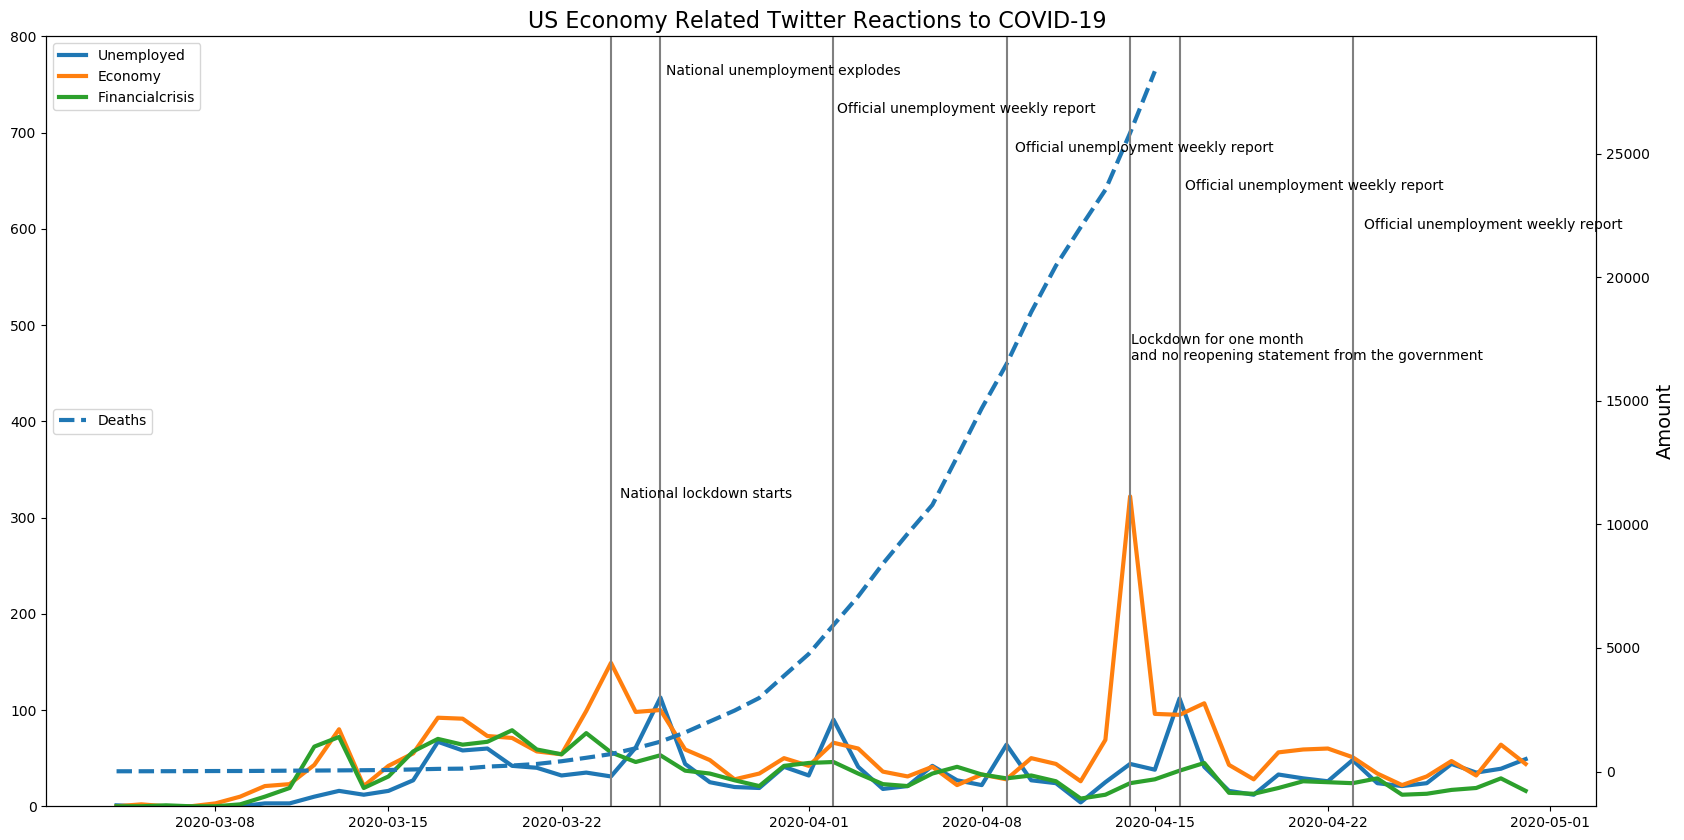

In [290]:
# ECONOMY DEEPDIVE
text_tweets['Unemployed'] = text_tweets['clean text'].str.contains('|'.join(['unemployment','unemployed'])).astype(int)
text_tweets['Economy'] = text_tweets['clean text'].str.contains('|'.join(['economy','economics'])).astype(int)
text_tweets['Financialcrisis'] = text_tweets['clean text'].str.contains('|'.join(['financialcrisis','financial','2007','2008','bankcollaps','banks'])).astype(int)

# Grouping categories of interest by the date. 
gb2 = text_tweets[['Date','Unemployed','Economy','Financialcrisis']].groupby('Date').sum()

# Plot of COVID-19 Twitter Development
# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[20,10])
ax2 = ax1.twinx()

plt.title("US Economy Related Twitter Reactions to COVID-19 ",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
ax1.set_ylim(0,800)

# Plotting lines
ax1.plot(gb2.index,gb2['Unemployed'], linewidth=3)
ax1.plot(gb2.index,gb2['Economy'], linewidth=3)
ax1.plot(gb2.index,gb2['Financialcrisis'], linewidth=3)
ax2.plot(df_corona_TW.index,df_corona_TW['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-03-24',c='grey')
plt.annotate('National lockdown starts',xy=(0.37 , 0.4), xycoords='axes fraction')
plt.axvline(x='2020-04-23',c='grey')
plt.annotate('National unemployment explodes',xy=(0.40 , 0.95), xycoords='axes fraction')
plt.axvline(x='2020-04-16',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.51 , 0.90), xycoords='axes fraction')
plt.axvline(x='2020-04-09',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.625 , 0.85), xycoords='axes fraction')
plt.axvline(x='2020-04-02',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.735 , 0.80), xycoords='axes fraction')
plt.axvline(x='2020-03-26',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.85 , 0.75), xycoords='axes fraction')
plt.axvline(x='2020-04-14',c='grey')
plt.annotate('Lockdown for one month',xy=(0.7, 0.60), xycoords='axes fraction')
plt.annotate('and no reopening statement from the government',xy=(0.7, 0.58), xycoords='axes fraction')

plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Unemployed', 'Economy', 'Financialcrisis'),loc=2)
ax2.legend(['Deaths'],loc=6)
plt.show()

The chart shows us a weekly trend in the 'Unemployed'-tweets. Futher investigation showed that these tweets peak the same day as the weekly official unemployment number report surfaces. This trend has been happening since few days after the lockdown officially started. Futhermore is a huge jump in tweets about economy happening the day where the government states that no reopening is insight. This clearly shows the people's high concerns with the economic situation that the lockdown causes which also often has been compared to the financial crisis in 2008. 


### General COVID19 awareness

The question now is if this attracts more attention in US than in other parts of the world. And where is US does the people concerned about corona live. The following section will try to find a pattern. 

In order to translate city data to latitude and longitude and get more precise location heatmap is it only tweets with city location that are kept.

In [300]:
All_tweets['number'] = All_tweets['Date'].dt.strftime("%Y%m%d").astype(int)
All_tweets_localmap = All_tweets[All_tweets['place_type']=='city']

Converting city names to latitude and longitude coordinates

In [302]:
# Dateframe to convert country code in twitter data to latitude and longitude coordinates.
df_City_lat_long = pd.read_csv('./Data/World_Cities_Location_table.csv',sep=';',header=None)

In [304]:
# Defining column names
df_City_lat_long['City'] = df_City_lat_long.iloc[:,2]
df_City_lat_long['Latitude'] = df_City_lat_long.iloc[:,3]
df_City_lat_long['Longitude'] = df_City_lat_long.iloc[:,4]

# Cleaning up the dateframe
del df_City_lat_long[0]
del df_City_lat_long[1]
del df_City_lat_long[2]
del df_City_lat_long[3]
del df_City_lat_long[4]
del df_City_lat_long[5]

# Making All_tweets_localmap dataframe ready to be merched with coordinates.
All_tweets_localmap['City'] = All_tweets_localmap.loc[:,'place_full_name'].str.split(',').str[0]
del All_tweets_localmap['place_type']
del All_tweets_localmap['place_full_name']
#del All_tweets_localmap['Latitude']
#del All_tweets_localmap['Longitude']

# Merging latitude and longitude city coordinates on to twitter data
All_tweets_localmap = All_tweets_localmap.merge(df_City_lat_long, on='City')

Now an interactive heatmap of a COVID19 awareness on twitter both locally and globally can be plotted. 

**Picture of heatmap**

In [ ]:
## Import of folium packages
#import folium
#from folium import plugins
#from folium.plugins import HeatMap

## Heatmap of COVID.19 Tweets in countries
#hMap3 = folium.Map([0, 0], zoom_start=2)

## Filter the DF
#Local_Heat_tweets = All_tweets_localmap[['Latitude', 'Longitude']]
## List comprehension to make out list of lists
#Local_Heat_tweets = [[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets.iterrows()]
## Plot it on the map
#HeatMap(Local_Heat_tweets,radius=12, max_zoom=20).add_to(hMap3)

#hMap3

When looking globally does it seems like the Social media awareness across the contries are about the same. Offcourse with a higher awareness in the heavely affected contries such as US and the europiean countries. When zooming into US can it a bit surprisingly be seen that the awareness in the middel of US is almost non exsisting (Or they dont use twitter ) while there is high awareness close to the coasts. 

Further more can an interactive heatmap over time of a COVID19 awareness on twitter also be plotted.

**video of heatmap**

In [ ]:
## inporting chain tool for concat of ranges
#from itertools import chain
## Heatmap running from start march to end march of COVID.19 Tweets in countries
#hMap4 = folium.Map([0, 0], zoom_start=2)

##Create weight column, using day number
#Local_Heat_tweets2 = All_tweets_localmap[['Latitude', 'Longitude','number']]

## List comprehension to make out list of lists
#Local_Heat_tweets2 = [[[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets2[Local_Heat_tweets2['number'] == i].iterrows()] for i in chain(range(20200303,20200331),range(20200401, 20200431))]

## Plot it on the map
#hm = plugins.HeatMapWithTime(Local_Heat_tweets2,auto_play=True,max_opacity=0.7, min_speed = 5.0,radius=6)
#hm.add_to(hMap4)
##Display the map
#hMap4

# Economic Impact Analysis
---------------
## Initialization 

A large aspect in the outbreak of Corona Virus has been the impact on the American Economy, individuals, companies and the state. 

To further gain an understanding of how the coronavirus already has and potentially will hit the American economy, we will look further into each of these aspects individually and try to gain a conclusion on all areas based on these. 

Specifically, we will first give a brief introduction to the movements in the market over the last years, and narrow in on the largest companies to show how stable they have been in the past. 

Then we will dive into the banks of America, and explain why their value is essentiel to the american economy, 

Following this, we will dive into numbers of employment and poverty in America and how these have fluctuated in the past

## 2.3) Basic Stats

### Data Sources and Packages
We have used Yahoo Finance to access data from the stock market in the United States, and other than that we have used a set of standard libraries used in this course. 

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import calendar
from IPython.core.display import display, HTML

### Dates 
We have identified a simple start date being 50 years back in time from hand in date. 

This will give us a broad view of general movements in the market - for instance, showing if the financial crisis was a once in a decade or more of a once in a century type of event. 

In [4]:
start = "1970-05-06"
end   = "2020-05-11"
financialStart = "2008-01-01"
financialEnd = "2010-01-01"

## The general stock market
First, we will get a view of the state of the American Economy from a business value perspective in general. 

We will look at both the movements of the 30 largest companies in America - known as the Dow Jones index - and the New York Stockmarket, knows as NASDAQ. 

In [5]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average" width="990" height="500"></iframe>

We gain access to the market using the Yahoo Finance package mentioned previously. 
We plot the Close prices to have a single daily value. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

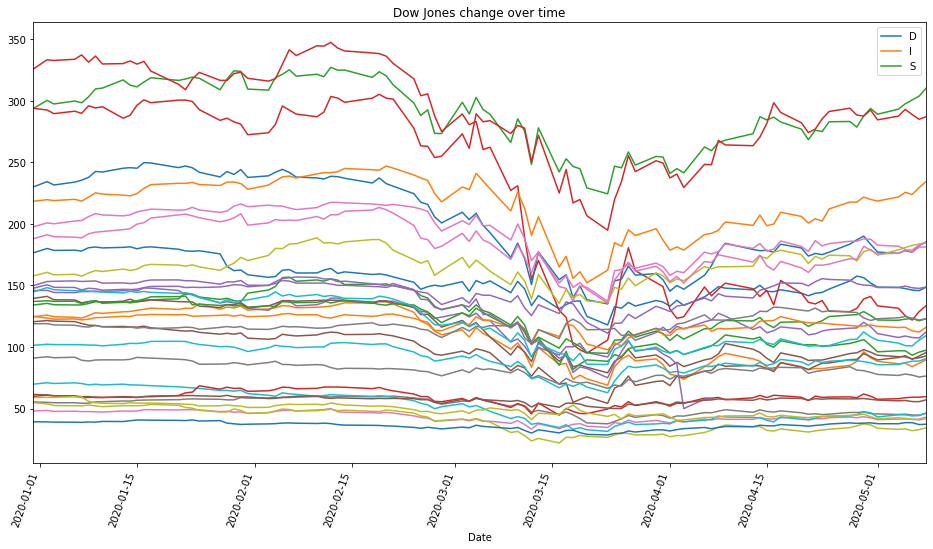

In [6]:
company_names = [
'3M',
'American Express',
'Apple',
'Boeing',
'Caterpillar',
'Chevron',
'Cisco Systems',
'Coca-Cola',
'Dow Inc.',
'ExxonMobil',
'Goldman Sachs',
'The Home Depot',
'IBM',
'Intel',
'Johnson & Johnson',
'JPMorgan Chase',
'McDonald\'s',
'Merck & Company',
'Microsoft',
'Nike',
'Pfizer',
'Procter & Gamble',
'Travelers',
'UnitedHealth Group',
'United Technologies',
'Verizon',
'Visa',
'Walmart',
'Walgreens Boots Alliance',
'Walt Disney',
]

symbols = [
'MMM',
'AXP',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DOW',
'XOM',
'GS',
'HD',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PFE',
'PG',
'TRV',
'UNH',
'UTX',
'VZ',
'V',
'WMT',
'WBA',
'DIS',
]

for i in symbols:
    df1=yf.download(i, start='2020-01-01', end=end)
    df1['Close'].plot(figsize=(16, 9))

    plt.legend(i)
    plt.xticks(rotation=70)
    plt.title('Dow Jones change over time')
    

Luckily, these can also be called as a single subject from Yahoo Finance accumulated to see the change in the top 30 american stocks over time.

[*********************100%***********************]  1 of 1 completed


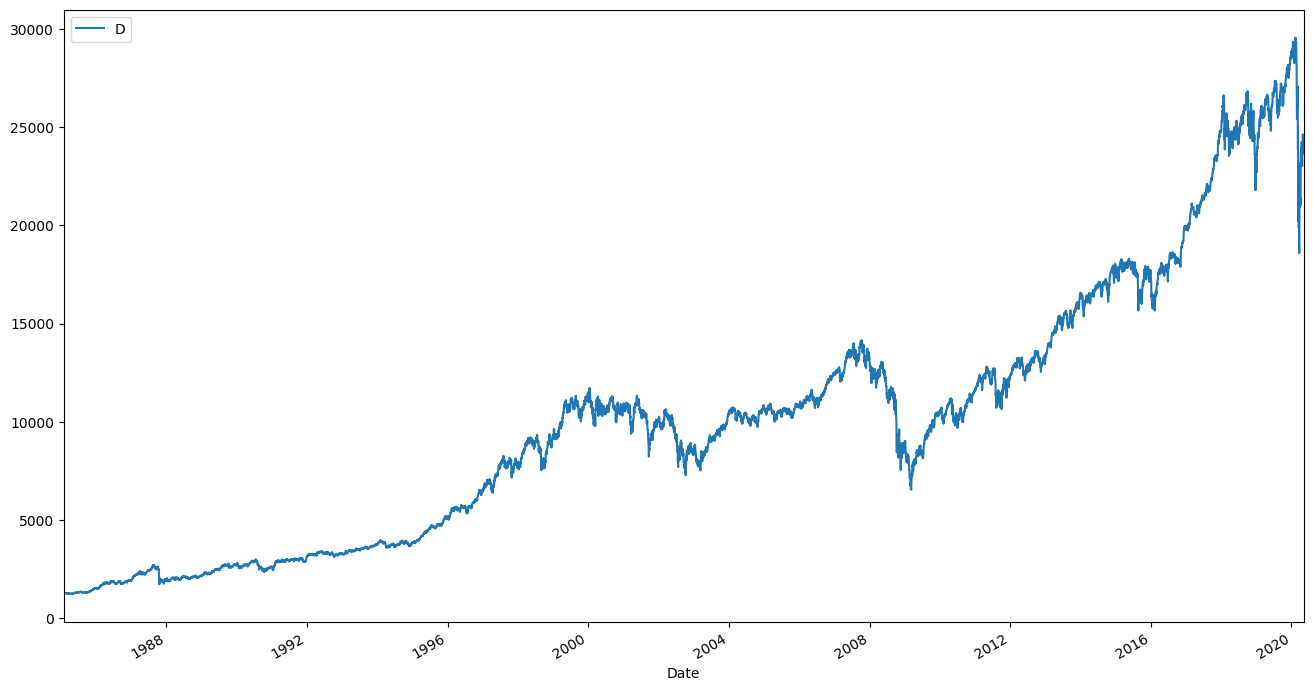

In [10]:
DowJones  = yf.download("^DJI", start=start, end=end) # JP Morgan
DowJones['Close'].plot(figsize=(16, 9))

plt.legend(('Dow Jones'))
plt.show()

As it can be seen, the Dow Jones has grown since it was introduced in 1986, with some smaller and larger bumps on the way. 

If we some in to the recent years after the financial crisis, we can see how the Dow Jones has dropped rapidly now after several years of growth - but now has seen a rise again. 

[*********************100%***********************]  1 of 1 completed


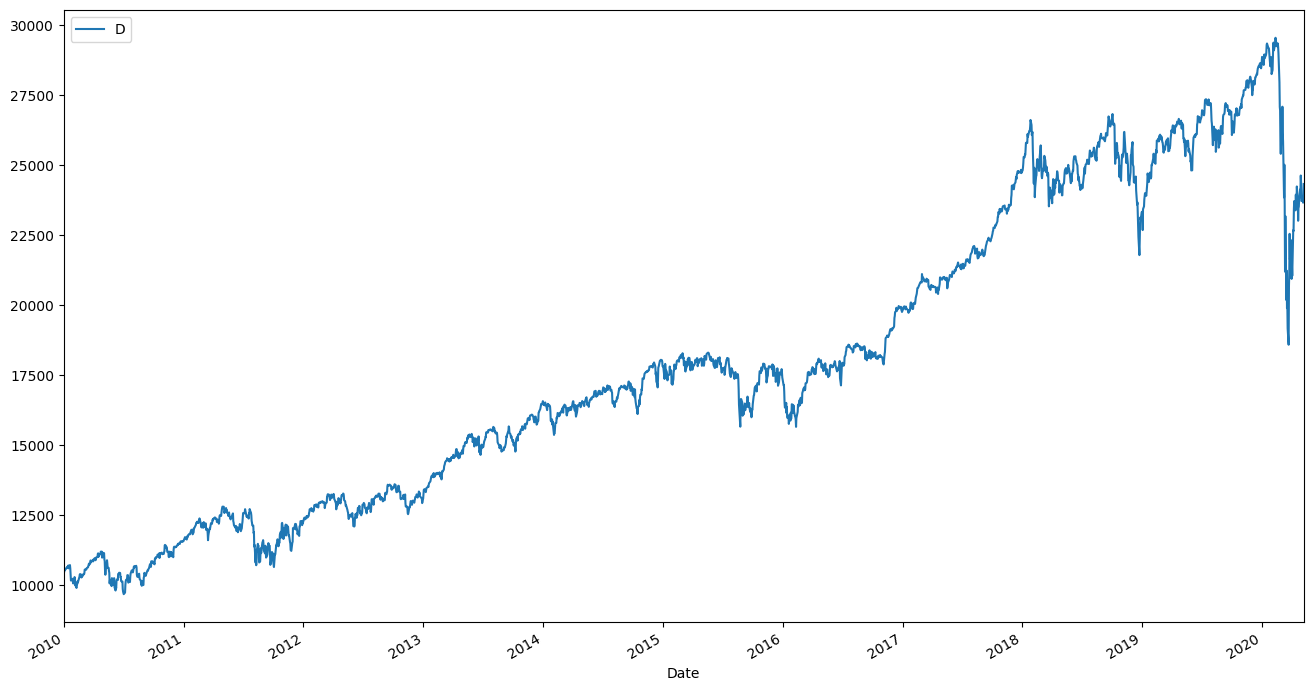

In [11]:
DowJones20082020  = yf.download("^DJI", start=financialEnd, end=end) # JP Morgan
DowJones20082020['Close'].plot(figsize=(16, 9))

plt.legend(('Dow Jones'))

[*********************100%***********************]  1 of 1 completed


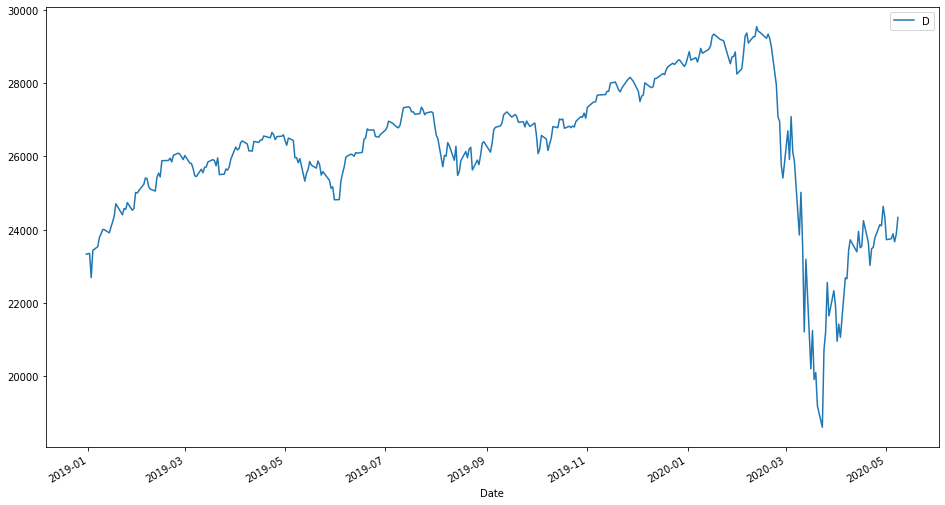

In [84]:
DowJones2020  = yf.download("^DJI", start="2019-01-01", end=end) # JP Morgan
DowJones2020['Close'].plot(figsize=(16, 9))

plt.legend(('Dow Jones'))

A focus on 2020 isolated shows us why the concerns were so severe - after a couple of years of steady growth following the financial crisis, the Dow Jones was hit hard by the shock of the Corona Virus. But the dip was nothing compared to the Financial Crisis

[*********************100%***********************]  1 of 1 completed


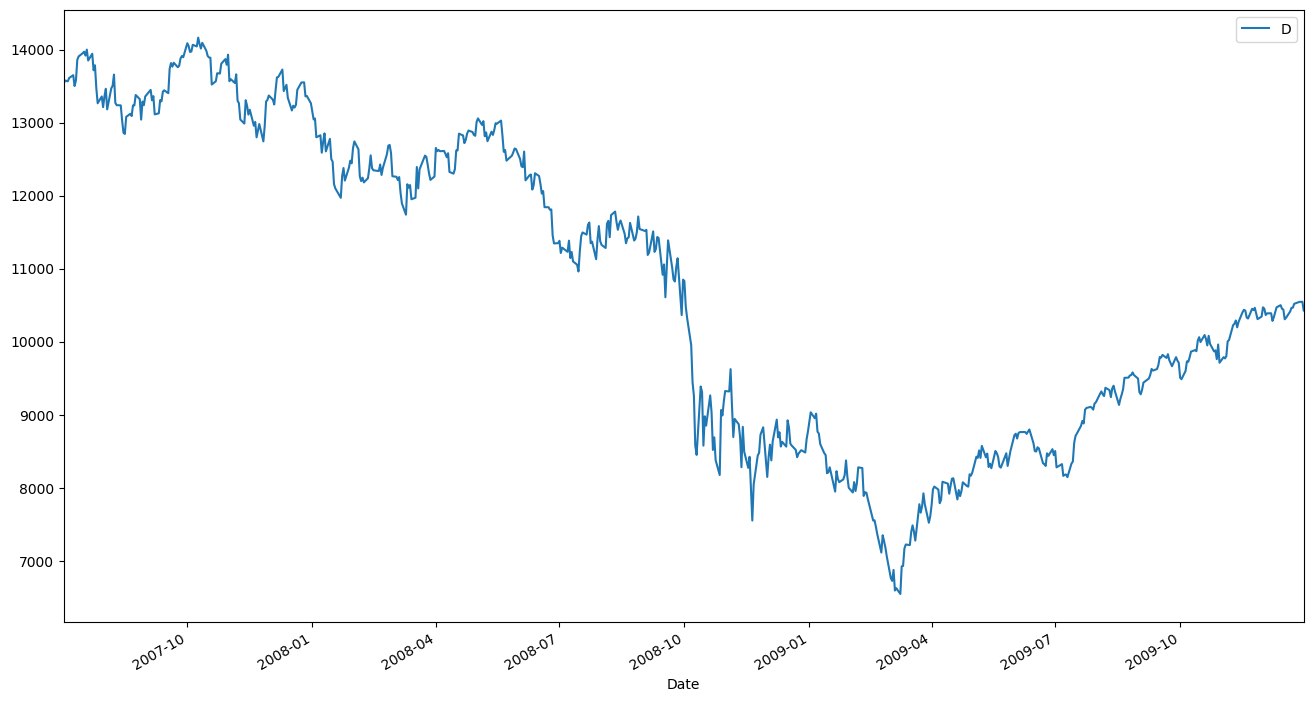

In [12]:
DowJonesFinancialCrisis  = yf.download("^DJI", start="2007-07-01", end="2010-01-01") # JP Morgan
DowJonesFinancialCrisis['Close'].plot(figsize=(16, 9))

plt.legend(('Dow Jones'))

The changes in movements here are obvious: 

- In the financial crisis, concerns grew over time leading to a long decline followed by a sharp drop
- With the Corona Virus, the shock was abrupt - but somehow the shock seemed to have had a lesser imidate impact. 

The pattern is clear to narrow down to a single line: 

**The financial crisis was caused by a rotten economy, with fragile and fraud loan structures. The Corona Virus was a result of a shock. Therefore, the value of the market reflected this.**

But still - we here massive issues in the American Economy, so why are the stocks not lower? 

A main reason is the Federal Reserve who printed a lot of money in late March to combate the drop in stocks - which resulted in the best day in Dow Jones ever! https://www.theguardian.com/world/2020/mar/24/coronavirus-data-shows-biggest-hit-to-business-activity-since-records-began



Text(0.5, 1.0, 'Change in Dow Jones in Billion USD')

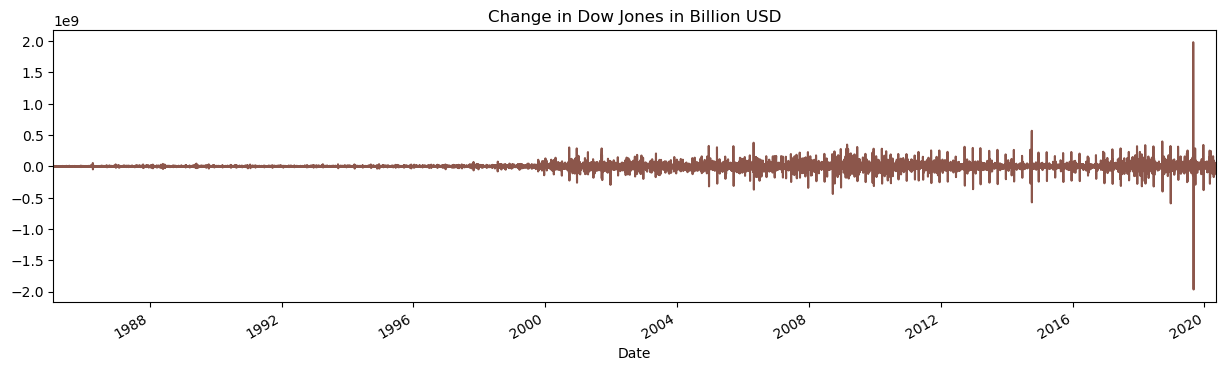

In [13]:
DowJonesChange = DowJones.diff(1)
DowJonesChange.plot(legend=False, grid=False)
plt.title(('Change in Dow Jones in Billion USD'))

## 3.3) Data Analysis

## Banks
- Analyzing the impact on American Banks
- Comparing different previous crisis

We have now investigated briefly how the stock market in general was affected. Now let us look at the big six banks in America - namely the banks noted too big to fail! 

"Too big to fail" describes a business or sector whose collapse would cause catastrophic damage to the economy.
The government will often intervene in situations where failure poses a grave risk to the economy.
One example of such intervention was the Emergency Economic Stabilization Act of 2008, which included the $700 billion Troubled Asset Relief Program (TARP). 

Banks that the U.S. Federal Reserve has said could threaten the stability of the U.S. financial system include the following:

- Bank of America Corporation
- The Bank of New York Mellon Corporation
- Barclays PLC
- Citigroup Inc.
- Credit Suisse Group AG
- Deutsche Bank AG
- The Goldman Sachs Group, Inc.
- JP Morgan Chase & Co.
- Morgan Stanley
- State Street Corporation
- UBS AG
- Wells Fargo & Company

We have imported the banks using Yahoo Finances data reader

In [14]:
# Plot everything by leveraging the very powerful matplotlib package
JPM  = yf.download("JPM", start=start, end=end) # JP Morgan

BAC  = yf.download("BAC", start=start, end=end) # Bank of America

C    = yf.download("C", start=start, end=end)   # Citygroup

GS   = yf.download("GS", start=start, end=end)  # Goldman Sachs

MS   = yf.download("MS", start=start, end=end)  # Morgan Stanley

WFC  = yf.download("WFC", start=start, end=end) # Wells Fargo

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


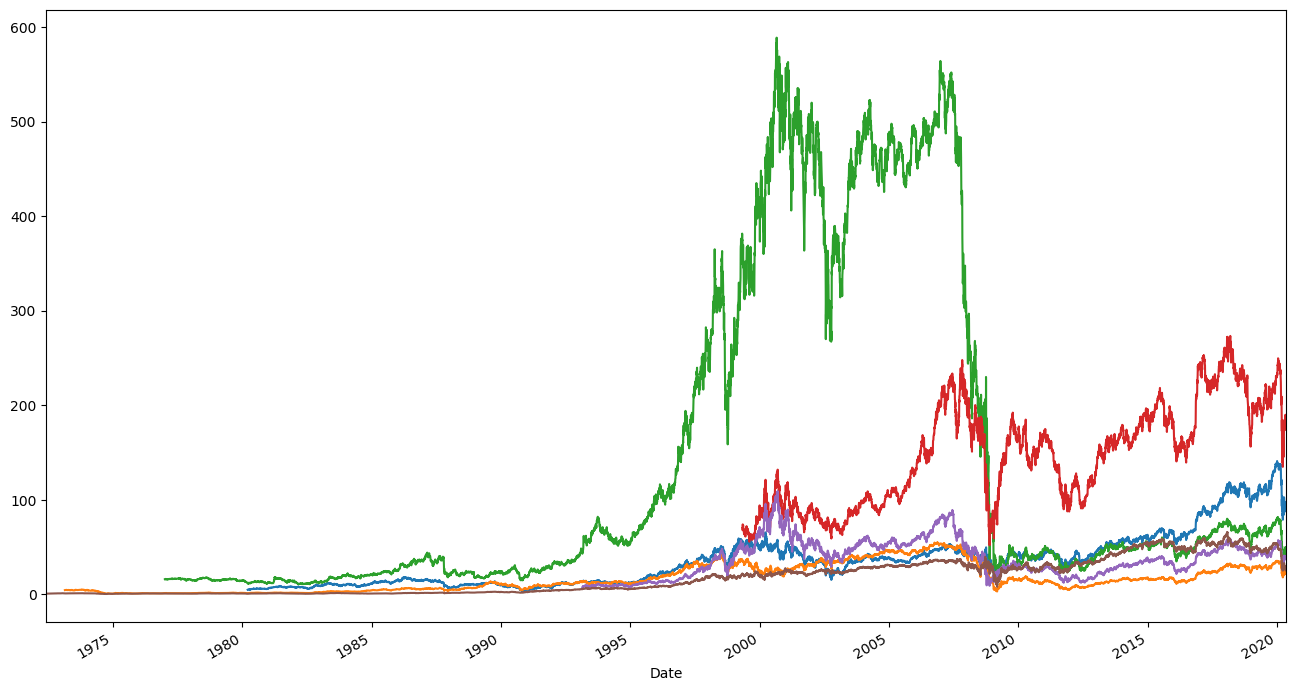

In [24]:
JPM['Close'].plot(figsize=(16, 9))
BAC['Close'].plot(figsize=(16, 9))
C['Close'].plot(figsize=(16, 9))
GS['Close'].plot(figsize=(16, 9))
MS['Close'].plot(figsize=(16, 9))
WFC['Close'].plot(figsize=(16, 9))
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


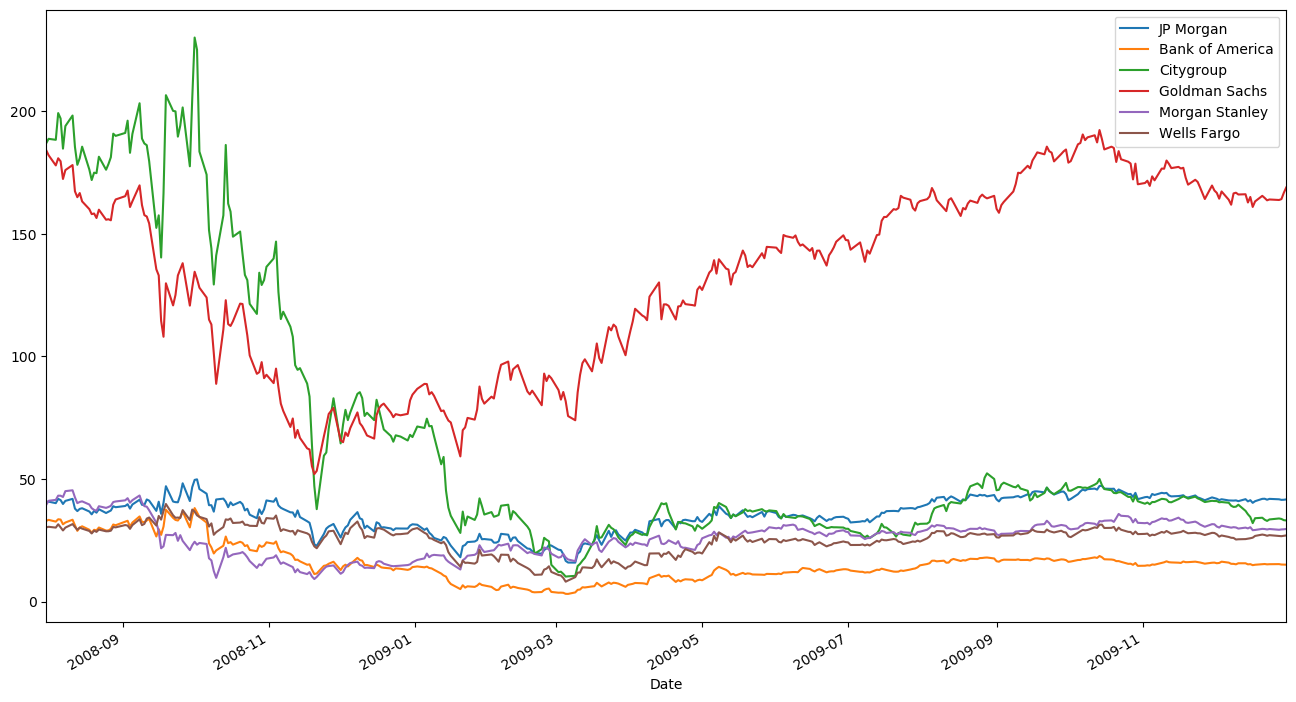

In [25]:
crackstart = "2008-08-01"
crackend   = "2010-01-01"

# Plot everything by leveraging the very powerful matplotlib package
JPMcrack  = yf.download("JPM", start=crackstart, end=crackend) # JP Morgan

BACcrack  = yf.download("BAC", start=crackstart, end=crackend) # Bank of America

Ccrack    = yf.download("C", start=crackstart, end=crackend)   # Citygroup

GScrack   = yf.download("GS", start=crackstart, end=crackend)  # Goldman Sachs

MScrack   = yf.download("MS", start=crackstart, end=crackend)  # Morgan Stanley

WFCcrack  = yf.download("WFC", start=crackstart, end=crackend) # Wells Fargo

JPMcrack['Close'].plot(figsize=(16, 9))
BACcrack['Close'].plot(figsize=(16, 9))
Ccrack['Close'].plot(figsize=(16, 9))
GScrack['Close'].plot(figsize=(16, 9))
MScrack['Close'].plot(figsize=(16, 9))
WFCcrack['Close'].plot(figsize=(16, 9))

plt.legend(('JP Morgan', 'Bank of America','Citygroup', 'Goldman Sachs', 'Morgan Stanley', 'Wells Fargo'))
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


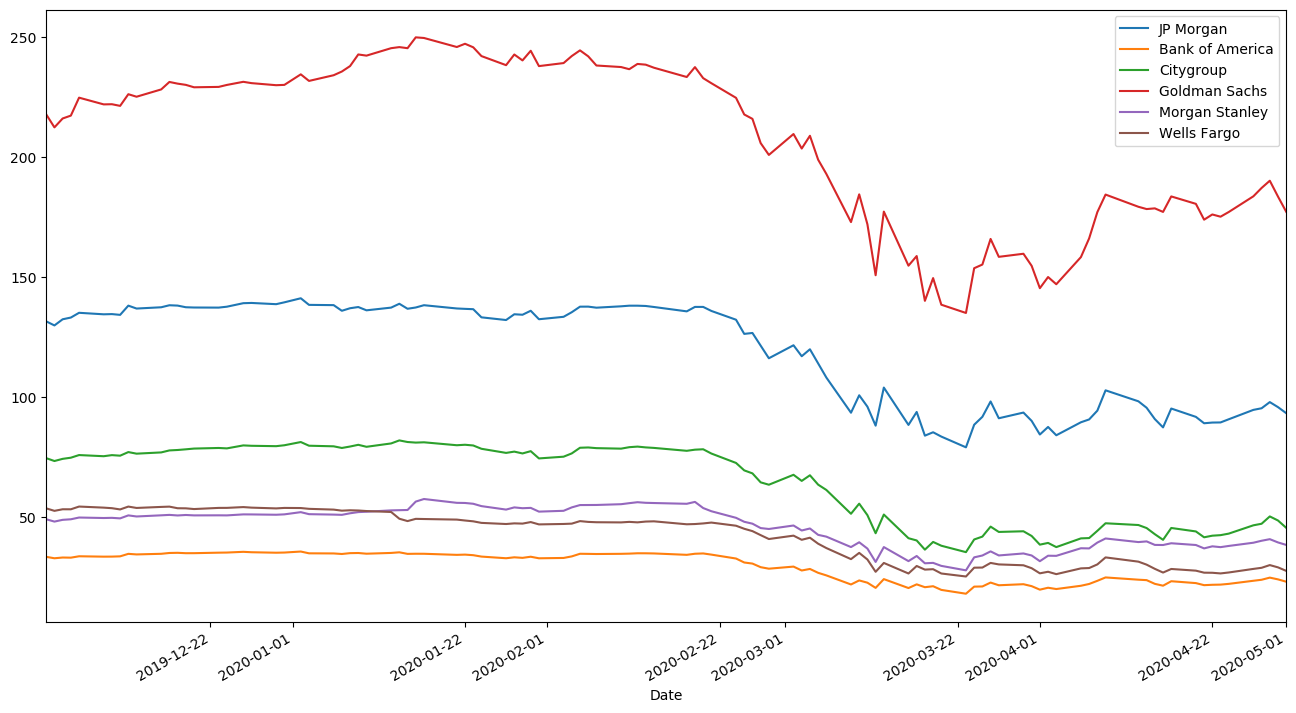

In [26]:
coronastart = "2019-12-01"
coronaend   = "2020-05-03"

# Plot everything by leveraging the very powerful matplotlib package
JPMcorona  = yf.download("JPM", start=coronastart, end=coronaend) # JP Morgan

BACcorona  = yf.download("BAC", start=coronastart, end=coronaend) # Bank of America

Ccorona    = yf.download("C", start=coronastart, end=coronaend)   # Citygroup

GScorona   = yf.download("GS", start=coronastart, end=coronaend)  # Goldman Sachs

MScorona   = yf.download("MS", start=coronastart, end=coronaend)  # Morgan Stanley

WFCcorona  = yf.download("WFC", start=coronastart, end=coronaend) # Wells Fargo

JPMcorona['Close'].plot(figsize=(16, 9))
BACcorona['Close'].plot(figsize=(16, 9))
Ccorona['Close'].plot(figsize=(16, 9))
GScorona['Close'].plot(figsize=(16, 9))
MScorona['Close'].plot(figsize=(16, 9))
WFCcorona['Close'].plot(figsize=(16, 9))

plt.legend(('JP Morgan', 'Bank of America','Citygroup', 'Goldman Sachs', 'Morgan Stanley', 'Wells Fargo'))
plt.show()

## Conclusion to the state of the American Economy: 
From the relative small drop in the American Economy - and the prognosis that the value of stock is rising back to levels close to before Corona Virus, why are many experts still saying that we are in a critical state for the American Economy?

We investigated this online: 

#### The Federal Reserve
The Federal Reserve is printing money, generating more cash flow in America and thereby keeping the economy stable. 

## Winners of the outbreak
However, it has been said that some companies did not lose on the Corona Virus - on the contrary, they prospered on the pandemic. 
https://finance.yahoo.com/news/best-worst-performing-stocks-coronavirus-130801281.html


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


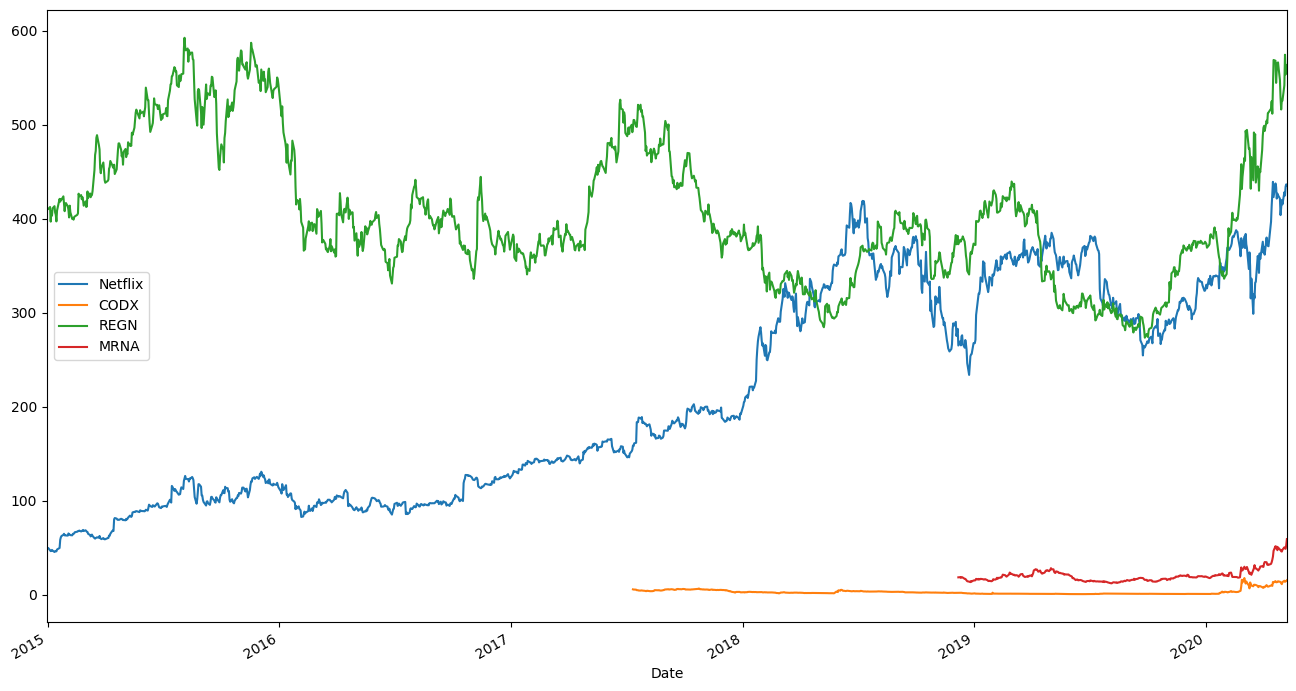

In [27]:
Netflix  = yf.download("NFLX", start="2015-01-01", end=end)
Netflix['Close'].plot(figsize=(16, 9))

CODX  = yf.download("CODX", start="2015-01-01", end=end)# JP Morgan
CODX['Close'].plot(figsize=(16, 9))

REGN  = yf.download("REGN", start="2015-01-01", end=end)# JP Morgan
REGN['Close'].plot(figsize=(16, 9))

MRNA  = yf.download("MRNA", start="2015-01-01", end=end)# JP Morgan
MRNA['Close'].plot(figsize=(16, 9))

plt.legend(('Netflix', 'CODX','REGN', 'MRNA'))
plt.show()

The graph shows a couple of findings: 

- the companies declared winners are of very different sizes
- two of them have not been on the stock market for very long
- as written in the article, they seem to have experienced some rapid growth

If we zoom into the current period of time, specifically from 2020 and onwards, their development is a bit more clear

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


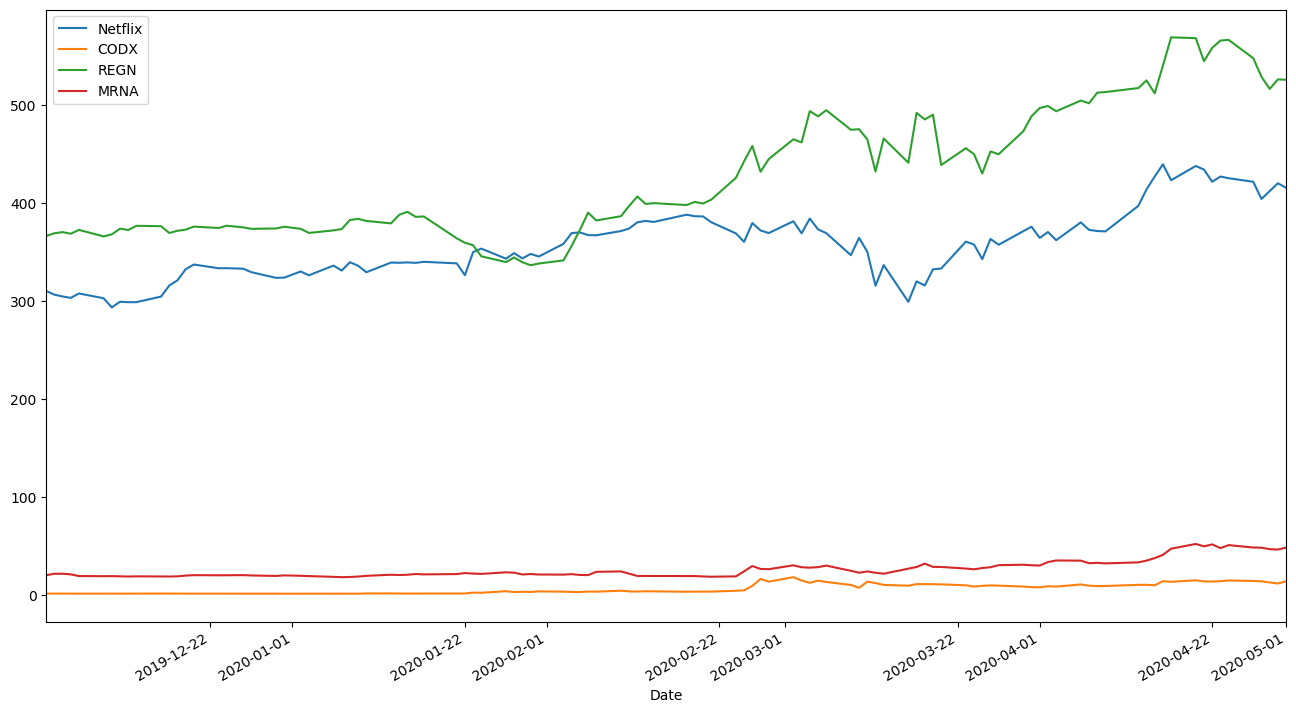

In [28]:
Netflixcorona  = yf.download("NFLX", start=coronastart, end=coronaend)
Netflixcorona['Close'].plot(figsize=(16, 9))

CODXcorona  = yf.download("CODX", start=coronastart, end=coronaend)
CODXcorona['Close'].plot(figsize=(16, 9))

REGNcorona  = yf.download("REGN", start=coronastart, end=coronaend)
REGNcorona['Close'].plot(figsize=(16, 9))

MRNAcorona  = yf.download("MRNA", start=coronastart, end=coronaend)
MRNAcorona['Close'].plot(figsize=(16, 9))

plt.legend(['Netflix', 'CODX','REGN', 'MRNA'])
plt.show()


Looking at the individual changes, their percentual growth is much more clear

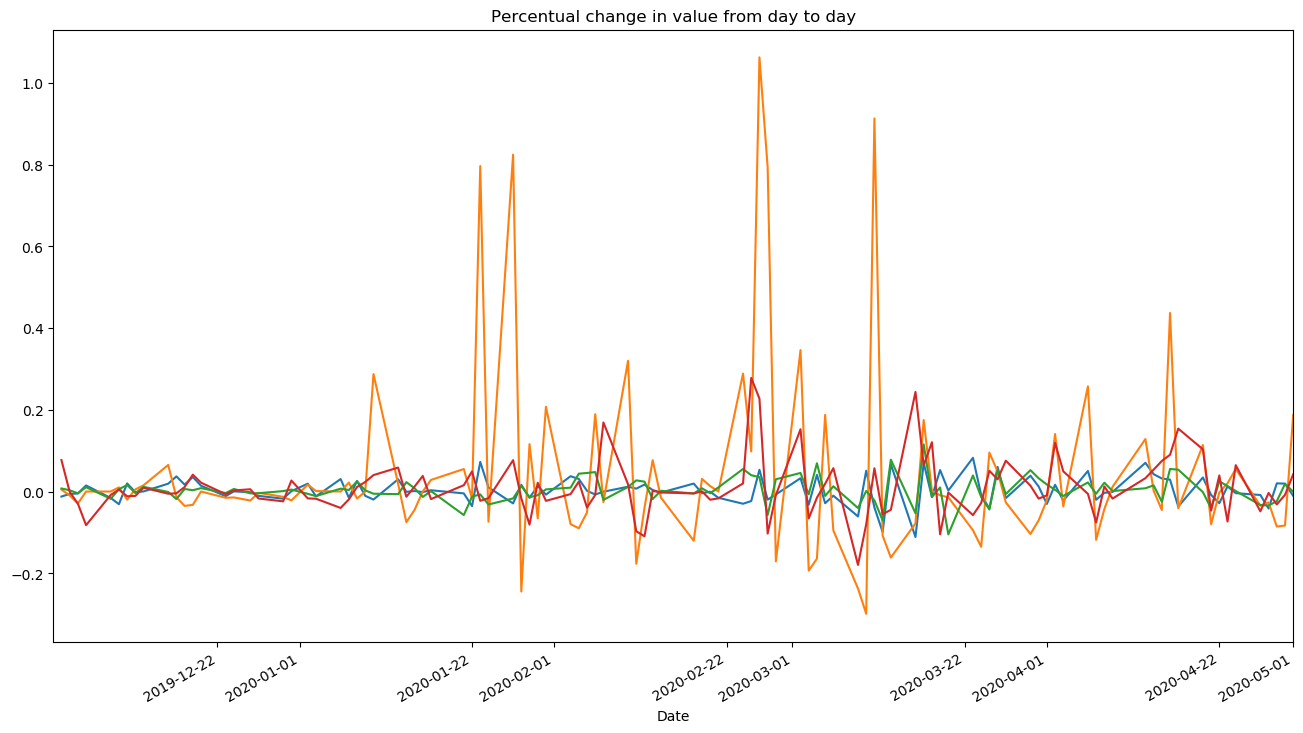

In [29]:
NetflixcoronaChange = Netflixcorona.pct_change(1)
NetflixcoronaChange['Close'].plot(figsize=(16, 9))

CODXcoronaChange = CODXcorona.pct_change(1)
CODXcoronaChange['Close'].plot(figsize=(16, 9))

REGNcoronaChange = REGNcorona.pct_change(1)
REGNcoronaChange['Close'].plot(figsize=(16, 9))

MRNAcoronaChange = MRNAcorona.pct_change(1)
MRNAcoronaChange['Close'].plot(figsize=(16, 9))

plt.title("Percentual change in value from day to day")
plt.show()

## Jobs and poverty in America
So, if so many companies are doing incredibly well, why should the american economy be afraid? The largest companies are not losing money, and some companies are even benefitting of the crisis? 

The American economy is still under a lot of pressure - for several reasons. First and foremost, as described before, because of the blowtorch the American Government is currently helping fuel the fire - printing money in the Federal Reserve - is not a feasible solution. 

Furtherore, there is another huge player in the American Economy who relies heavily on the American Individual, and whom the American Economy is hugely dependent on: the banks.  

We have investigated how the banks have fallen in value - but there is still a major concern that the large players could crack. The reason the American Economy cracked in 2008 was because of horrible loan structures. Some of these have been removed, and they are not as easy to obtain - but the banks still have a lot of money floating in housing loans. 

The banks need the money. If the individual can't pay their loans, the house they bought will be handed over to the bank - but the bank can't use this value, and since the individual not being able to pay his loans will not buy a new house with a new loan the bank essentially has less money. 

The largest reason for people not being able to pay their loan is uneployment - and this is an area that should raise concern

In [30]:
jobs = pd.read_excel("Data/Jobs.xlsx")

In [31]:
jobs

Labor Force Statistics from the Current Population Survey  \
0                                 Original Data Value          
1                                                 NaN          
2                                          Series Id:          
3                                 Seasonally Adjusted          
4                                       Series title:          
..                                                ...          
79                                               2016          
80                                               2017          
81                                               2018          
82                                               2019          
83                                               2020          

                  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                        NaN        NaN        NaN        NaN        NaN   
1                        NaN        NaN        NaN        NaN        NaN   
2                LNS14000000        NaN        NaN        NaN        NaN   
3                        NaN        NaN        NaN        NaN        NaN   
4   (Seas) Unemployment Rate        NaN        NaN        NaN        NaN   
..                       ...        ...        ...        ...        ...   
79                       4.9        4.9          5          5        4.8   
80                       4.7        4.6        4.4        4.4        4.4   
81                       4.1        4.1          4          4        3.8   
82                         4        3.8        3.8        3.6        3.6   
83                       3.6        3.5        4.4       14.7        NaN   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0         NaN        NaN        NaN        NaN         NaN         NaN   
1         NaN        NaN        NaN        NaN         NaN         NaN   
2         NaN        NaN        NaN        NaN         NaN         NaN   
3         NaN        NaN        NaN        NaN         NaN         NaN   
4         NaN        NaN        NaN        NaN         NaN         NaN   
..        ...        ...        ...        ...         ...         ...   
79        4.9        4.8        4.9          5         4.9         4.7   
80        4.3        4.3        4.4        4.2         4.1         4.2   
81          4        3.8        3.8        3.7         3.8         3.7   
82        3.7        3.7        3.7        3.5         3.6         3.5   
83        NaN        NaN        NaN        NaN         NaN         NaN   

   Unnamed: 12  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
79         4.7  
80         4.1  
81         3.9  
82         3.5  
83         NaN  

[84 rows x 13 columns]

In [32]:
jobs = jobs.drop([0, 1,2,3,4,5,6,7,8,9])
jobs.columns = jobs.iloc[0]
jobs = jobs.drop([10])

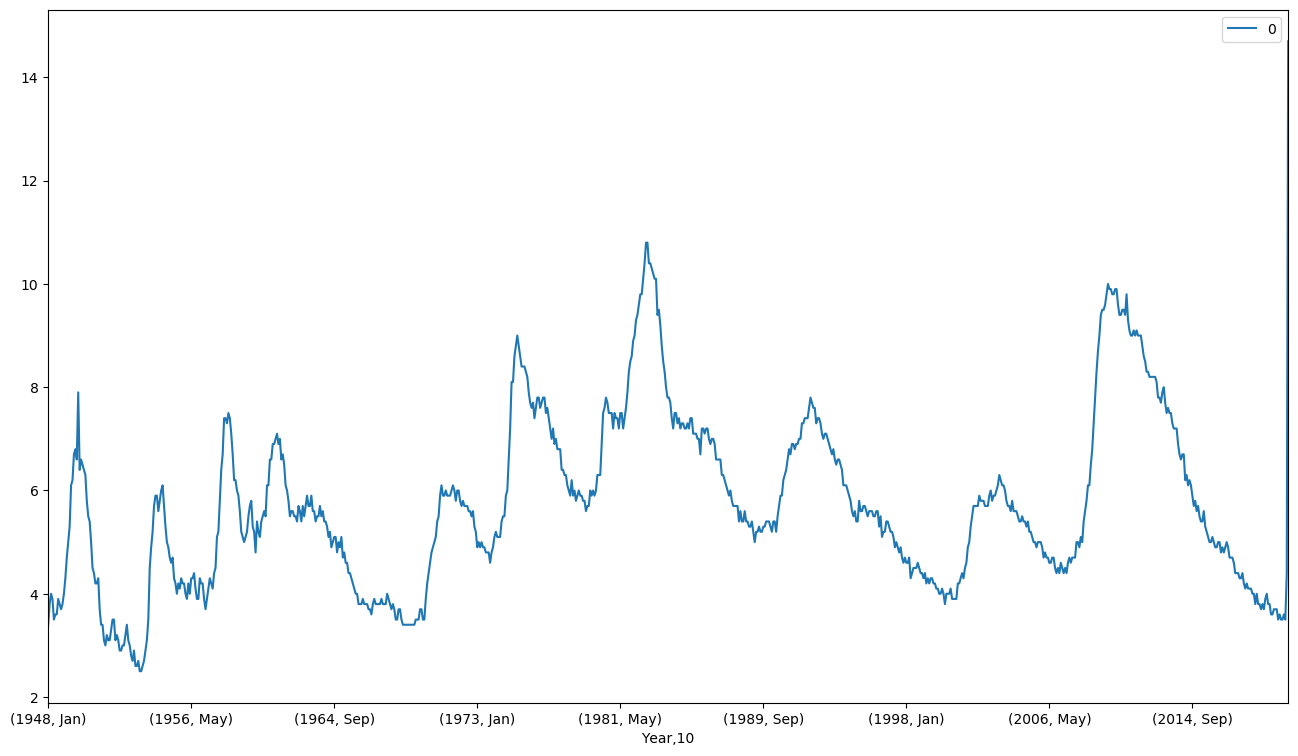

In [33]:
Unemployment = jobs.set_index('Year').stack()
Unemployment = pd.DataFrame(data=Unemployment)
Unemployment.plot(figsize=(16, 9))

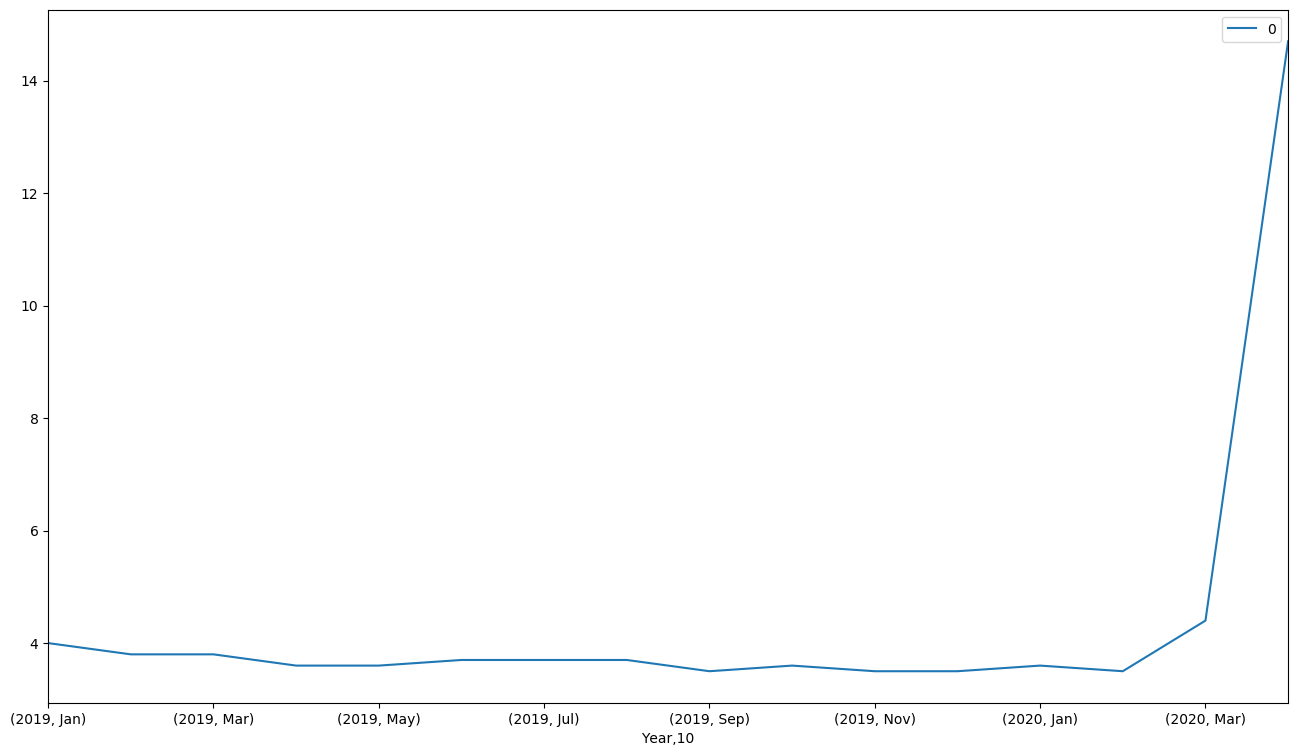

In [34]:
Unemployment[Unemployment.index.get_level_values(0) >= 2019].plot(figsize=(16, 9))
#Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

# 4) Genre

# 5) Visualizations

# 6) Discussion

# 7) Contributions

# 8) References